# 25/26 KM6312 Report Analysis Group Five Guys

1.Data collection

2.Data cleaning

PS: Both data collection and data cleaning processes are in the other jupyter notebook

3.Data processing

In [6]:
import importlib
import pandas as pd
importlib.reload(pd)
import pandas as pd

df = pd.read_csv("coded_factors.csv")

df['city'] = df['city'].astype(str)
df['size(employees_number)'] = df['size(employees_number)'].astype(int)
print('basic data information：')
df.info()

rows, columns = df.shape

if rows < 100 and columns < 20:
    
    print('all data content information：')
    print(df.to_csv(sep='\t', na_rep='nan'))
else:
    
    print('top lines data information：')
    print(df.head().to_csv(sep='\t', na_rep='nan'))

basic data information：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   position_category       1665 non-null   object 
 1   city                    1665 non-null   object 
 2   experience_atleast      1665 non-null   int64  
 3   education               1665 non-null   float64
 4   nature                  1665 non-null   object 
 5   size(employees_number)  1665 non-null   int32  
 6   benifit                 1665 non-null   int64  
 7   monthly_salary_avg      1665 non-null   int64  
 8   annual_salary_equiv     1665 non-null   int64  
 9   bonus_months            1665 non-null   int64  
dtypes: float64(1), int32(1), int64(5), object(3)
memory usage: 123.7+ KB
top lines data information：
	position_category	city	experience_atleast	education	nature	size(employees_number)	benifit	monthly_salary_avg	annual_salary_equiv	b

In [50]:
# conda install -c conda-forge category_encoders

In [9]:
import importlib
import pandas as pd
importlib.reload(pd)
import pandas as pd

df = pd.read_csv("coded_factors.csv")
import re 
def city_function(city_name):
    """
    对应Excel中的：City=IFS(F2="杭州",4,F2="上海",6,F2="广州",3,F2="郑州",8,F2="北京",1,F2="黄冈",5,F2="深圳",7,F2="成都",2)
    """
    city_mapping = {
        "杭州": 4, "上海": 6, "广州": 3, "郑州": 8,
        "北京": 1, "黄冈": 5, "深圳": 7, "成都": 2
    }
    return city_mapping.get(city_name, 0)  

def experience_function(experience_str):
    """
    对应Excel中的：Experience=IF(OR(K2="经验不限",K2="在校/应届"),0,IF(K2="5-10年",5,IF(K2="3-5年",3,IF(K2="1-3年",1,IF(K2="1年以内",1,IF(K2="10年以上",10))))))
    """
    if pd.isna(experience_str) or experience_str in ["经验不限", "在校/应届"]:
        return 0
    elif experience_str == "5-10年":
        return 5
    elif experience_str == "3-5年":
        return 3
    elif experience_str in ["1-3年", "1年以内"]:
        return 1
    elif experience_str == "10年以上":
        return 10
    else:
        return 0 

def education_function(education_str):
    """
    对应Excel中的：Education=IFS(M2="本科",1,M2="学历不限",0,M2="硕士",2,M2="大专",0.5)
    """
    education_mapping = {
        "本科": 1,
        "学历不限": 0,
        "硕士": 2,
        "大专": 0.5
    }
    return education_mapping.get(education_str, 0) 

def nature_function(nature_str):
    """
    对应Excel中的：Nature=IF(Q2="不需要融资",1,IF(Q2="已上市",2,0))
    """
    if nature_str == "不需要融资":
        return 1
    elif nature_str == "已上市":
        return 2
    else:
        return 0

def size_function(size_str):
    """
    对应Excel中的：Size=提取数字部分
    从字符串中提取数字（如从"100-499人"中提取100和499）
    """
    if pd.isna(size_str):
        return 0
    
   
    numbers = re.findall(r'\d+', str(size_str))
    
    if numbers:
        
        numbers = [int(num) for num in numbers]
        return sum(numbers) / len(numbers)
    else:
        return 0

def benefit_function(benefit_list):
    """
    对应Excel中的：Benefit=COUNTA(U2:AO2)
    计算非空值的数量
    """
    if isinstance(benefit_list, (list, tuple, pd.Series)):
        return sum(1 for item in benefit_list if pd.notna(item) and item != "")
    else:
        return 1 if pd.notna(benefit_list) and benefit_list != "" else 0

In [10]:
df = pd.read_csv("coded_factors.csv")

df['city'] = df['city'].astype(str)
df['size(employees_number)'] = df['size(employees_number)'].astype(int)
print('data basic content information：')
df.info()

rows, columns = df.shape


if rows < 100 and columns < 20:
    
    print('all data information：')
    print(df.to_csv(sep='\t', na_rep='nan'))
else:
    
    print('top lines data information：')
    print(df.head().to_csv(sep='\t', na_rep='nan'))

data basic content information：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   position_category       1665 non-null   object 
 1   city                    1665 non-null   object 
 2   experience_atleast      1665 non-null   int64  
 3   education               1665 non-null   float64
 4   nature                  1665 non-null   object 
 5   size(employees_number)  1665 non-null   int32  
 6   benifit                 1665 non-null   int64  
 7   monthly_salary_avg      1665 non-null   int64  
 8   annual_salary_equiv     1665 non-null   int64  
 9   bonus_months            1665 non-null   int64  
dtypes: float64(1), int32(1), int64(5), object(3)
memory usage: 123.7+ KB
top lines data information：
	position_category	city	experience_atleast	education	nature	size(employees_number)	benifit	monthly_salary_avg	annual_salary

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['figure.dpi'] = 300


X = df.drop(['monthly_salary_avg', 'annual_salary_equiv'], axis=1)
y_monthly = df['monthly_salary_avg']
y_annual = df['annual_salary_equiv']

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()


fig, axes = plt.subplots(nrows=len(X.columns), ncols=2, figsize=(15, 5 * len(X.columns)))


for i, col in enumerate(X.columns):
    if col in categorical_cols:
        sns.boxplot(x=col, y=y_monthly, data=df, ax=axes[i, 0])
        axes[i, 0].set_title(f'{col} 与月薪的关系')
    else:
        sns.scatterplot(x=col, y=y_monthly, data=df, ax=axes[i, 0])
        axes[i, 0].set_title(f'{col} 与月薪的关系')


for i, col in enumerate(X.columns):
    if col in categorical_cols:
        sns.boxplot(x=col, y=y_annual, data=df, ax=axes[i, 1])
        axes[i, 1].set_title(f'{col} 与年薪的关系')
    else:
        sns.scatterplot(x=col, y=y_annual, data=df, ax=axes[i, 1])
        axes[i, 1].set_title(f'{col} 与年薪的关系')

plt.tight_layout()
plt.show()

C:\Users\28160\AppData\Local\Temp\ipykernel_28352\3548911677.py:37: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  plt.tight_layout()
C:\Users\28160\AppData\Local\Temp\ipykernel_28352\3548911677.py:37: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  plt.tight_layout()
C:\Users\28160\AppData\Local\Temp\ipykernel_28352\3548911677.py:37: UserWarning: Glyph 34218 (\N{CJK UNIFIED IDEOGRAPH-85AA}) missing from current font.
  plt.tight_layout()
C:\Users\28160\AppData\Local\Temp\ipykernel_28352\3548911677.py:37: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  plt.tight_layout()
C:\Users\28160\AppData\Local\Temp\ipykernel_28352\3548911677.py:37: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  plt.tight_layout()
C:\Users\28160\AppData\Local\Temp\ipykernel_28352\3548911677.py:37: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) miss

In [16]:
csv_path = 'coded_factors_encoded1.csv'
df.to_csv(csv_path, index=False)
print(f'save as {csv_path}')

save as coded_factors_encoded1.csv


4. EDA

In [17]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [18]:
!pip install geopandas

     ---------------------------------------- 59.7/59.7 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 323.6/323.6 kB 6.7 MB/s eta 0:00:00
   ---------------------------------------- 15.9/15.9 MB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 19.2/19.2 MB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 6.1/6.1 MB 7.2 MB/s eta 0:00:00
   ---------------------------------------- 1.4/1.4 MB 11.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 2.0.2 which is incompatible.
scipy 1.10.1 requires numpy<1.27.0,>=1.19.5, but you have numpy 2.0.2 which is incompatible.


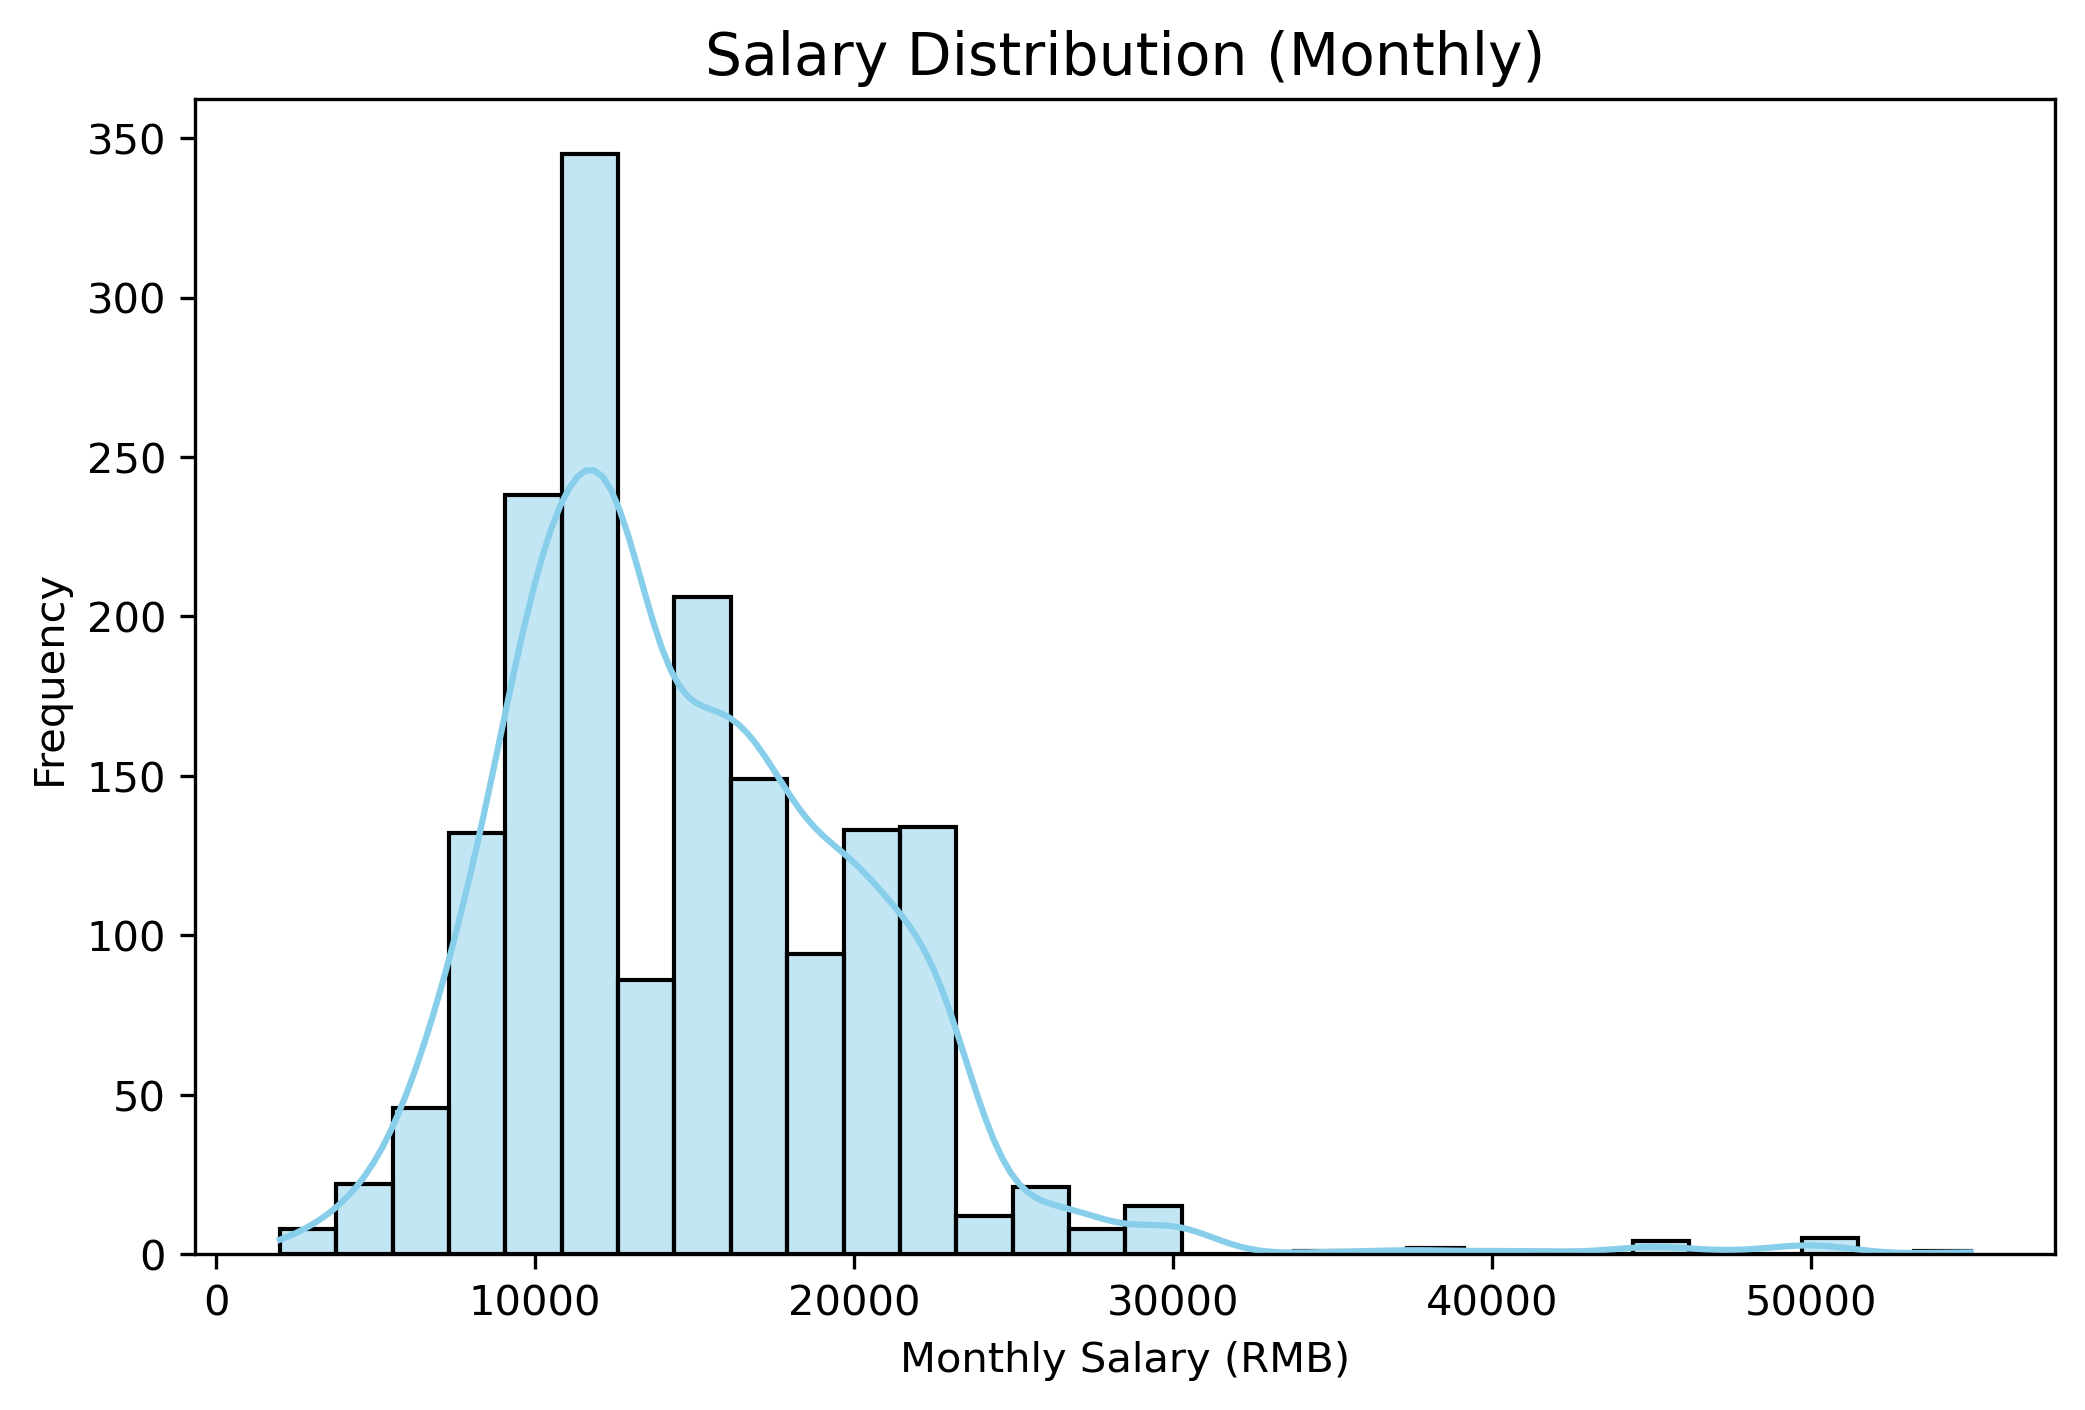

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("coded_factors.csv", encoding='utf-8')

plt.figure(figsize=(8,5))
sns.histplot(df['monthly_salary_avg'], kde=True, bins=30, color='skyblue')
plt.title("Salary Distribution (Monthly)", fontsize=14)
plt.xlabel("Monthly Salary (RMB)")
plt.ylabel("Frequency")
plt.show()

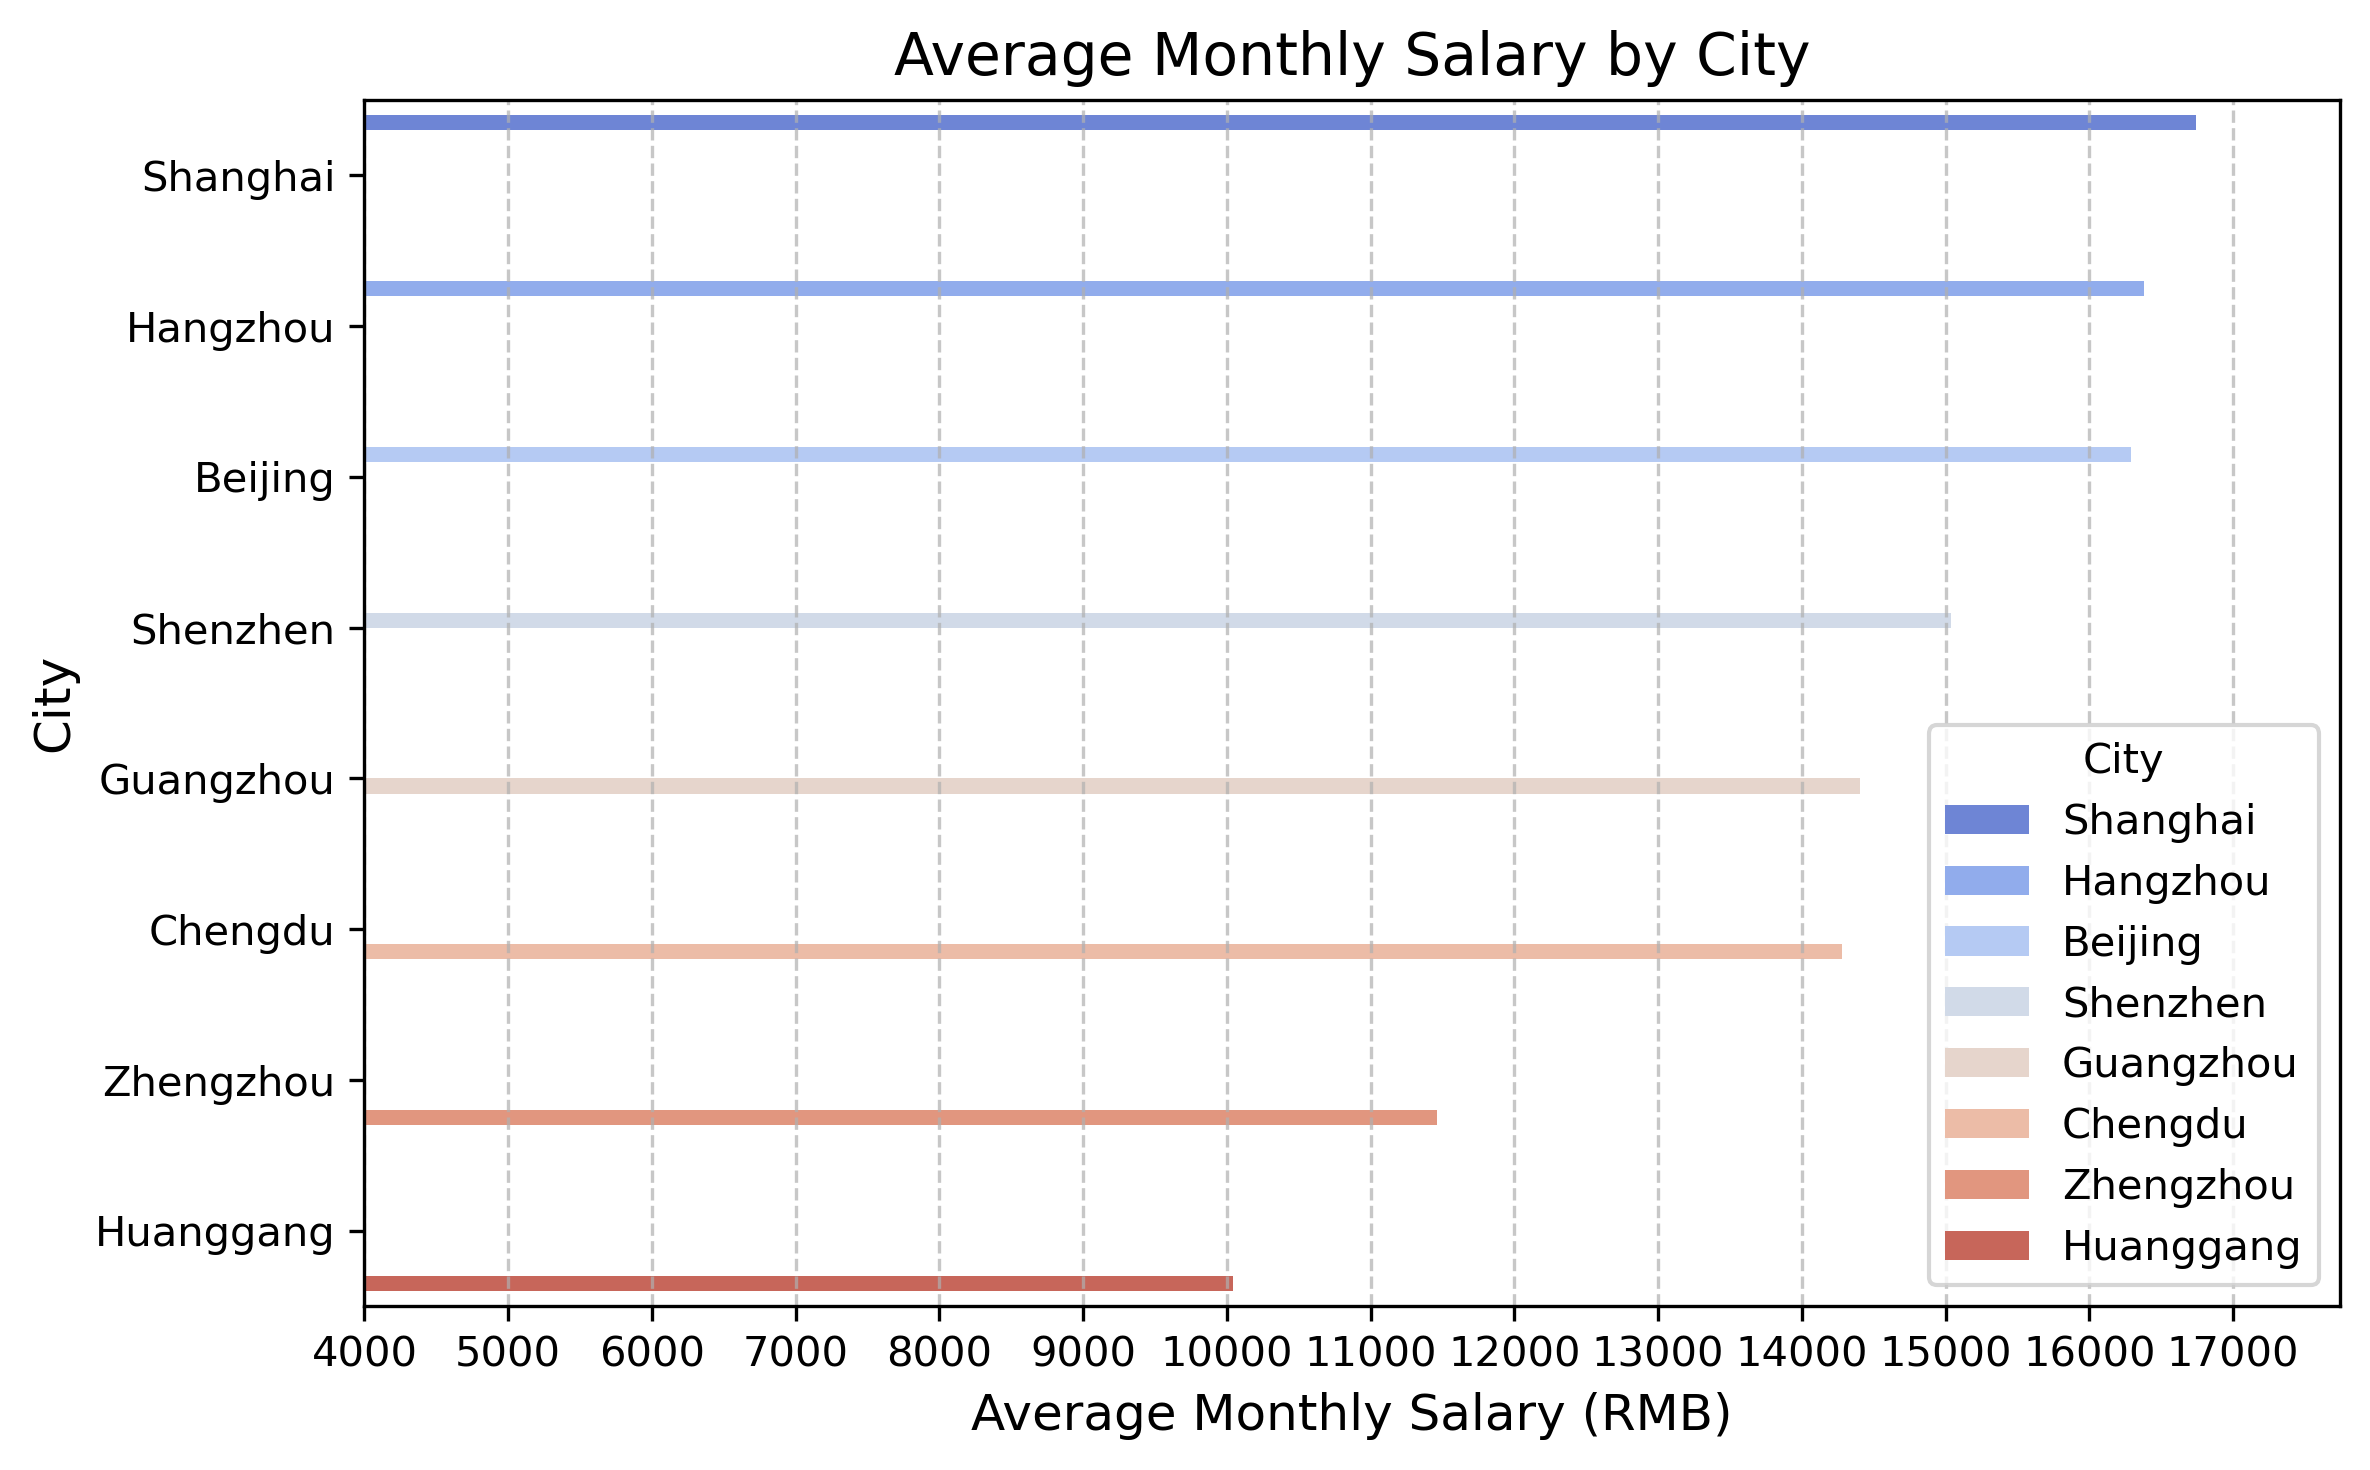

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("coded_factors.csv", encoding='utf-8')

city_map = {
    1: 'Beijing', 2: 'Chengdu', 3: 'Guangzhou',
    4: 'Hangzhou', 5: 'Huanggang', 6: 'Shanghai',
    7: 'Shenzhen', 8: 'Zhengzhou'
}
df['city_name'] = df['city'].map(city_map)

city_salary = df.groupby('city_name')['monthly_salary_avg'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(
    x='monthly_salary_avg',
    y='city_name',
    data=city_salary.sort_values('monthly_salary_avg', ascending=False),
    hue='city_name',
    palette='coolwarm',
)

plt.title("Average Monthly Salary by City", fontsize=14)
plt.xlabel("Average Monthly Salary (RMB)", fontsize=12)
plt.ylabel("City", fontsize=12)

plt.legend(title='City')

xmin, xmax = 4000, city_salary['monthly_salary_avg'].max() + 1000
plt.xlim(xmin, xmax)
plt.xticks(np.arange(xmin, xmax+1, 1000)) 

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

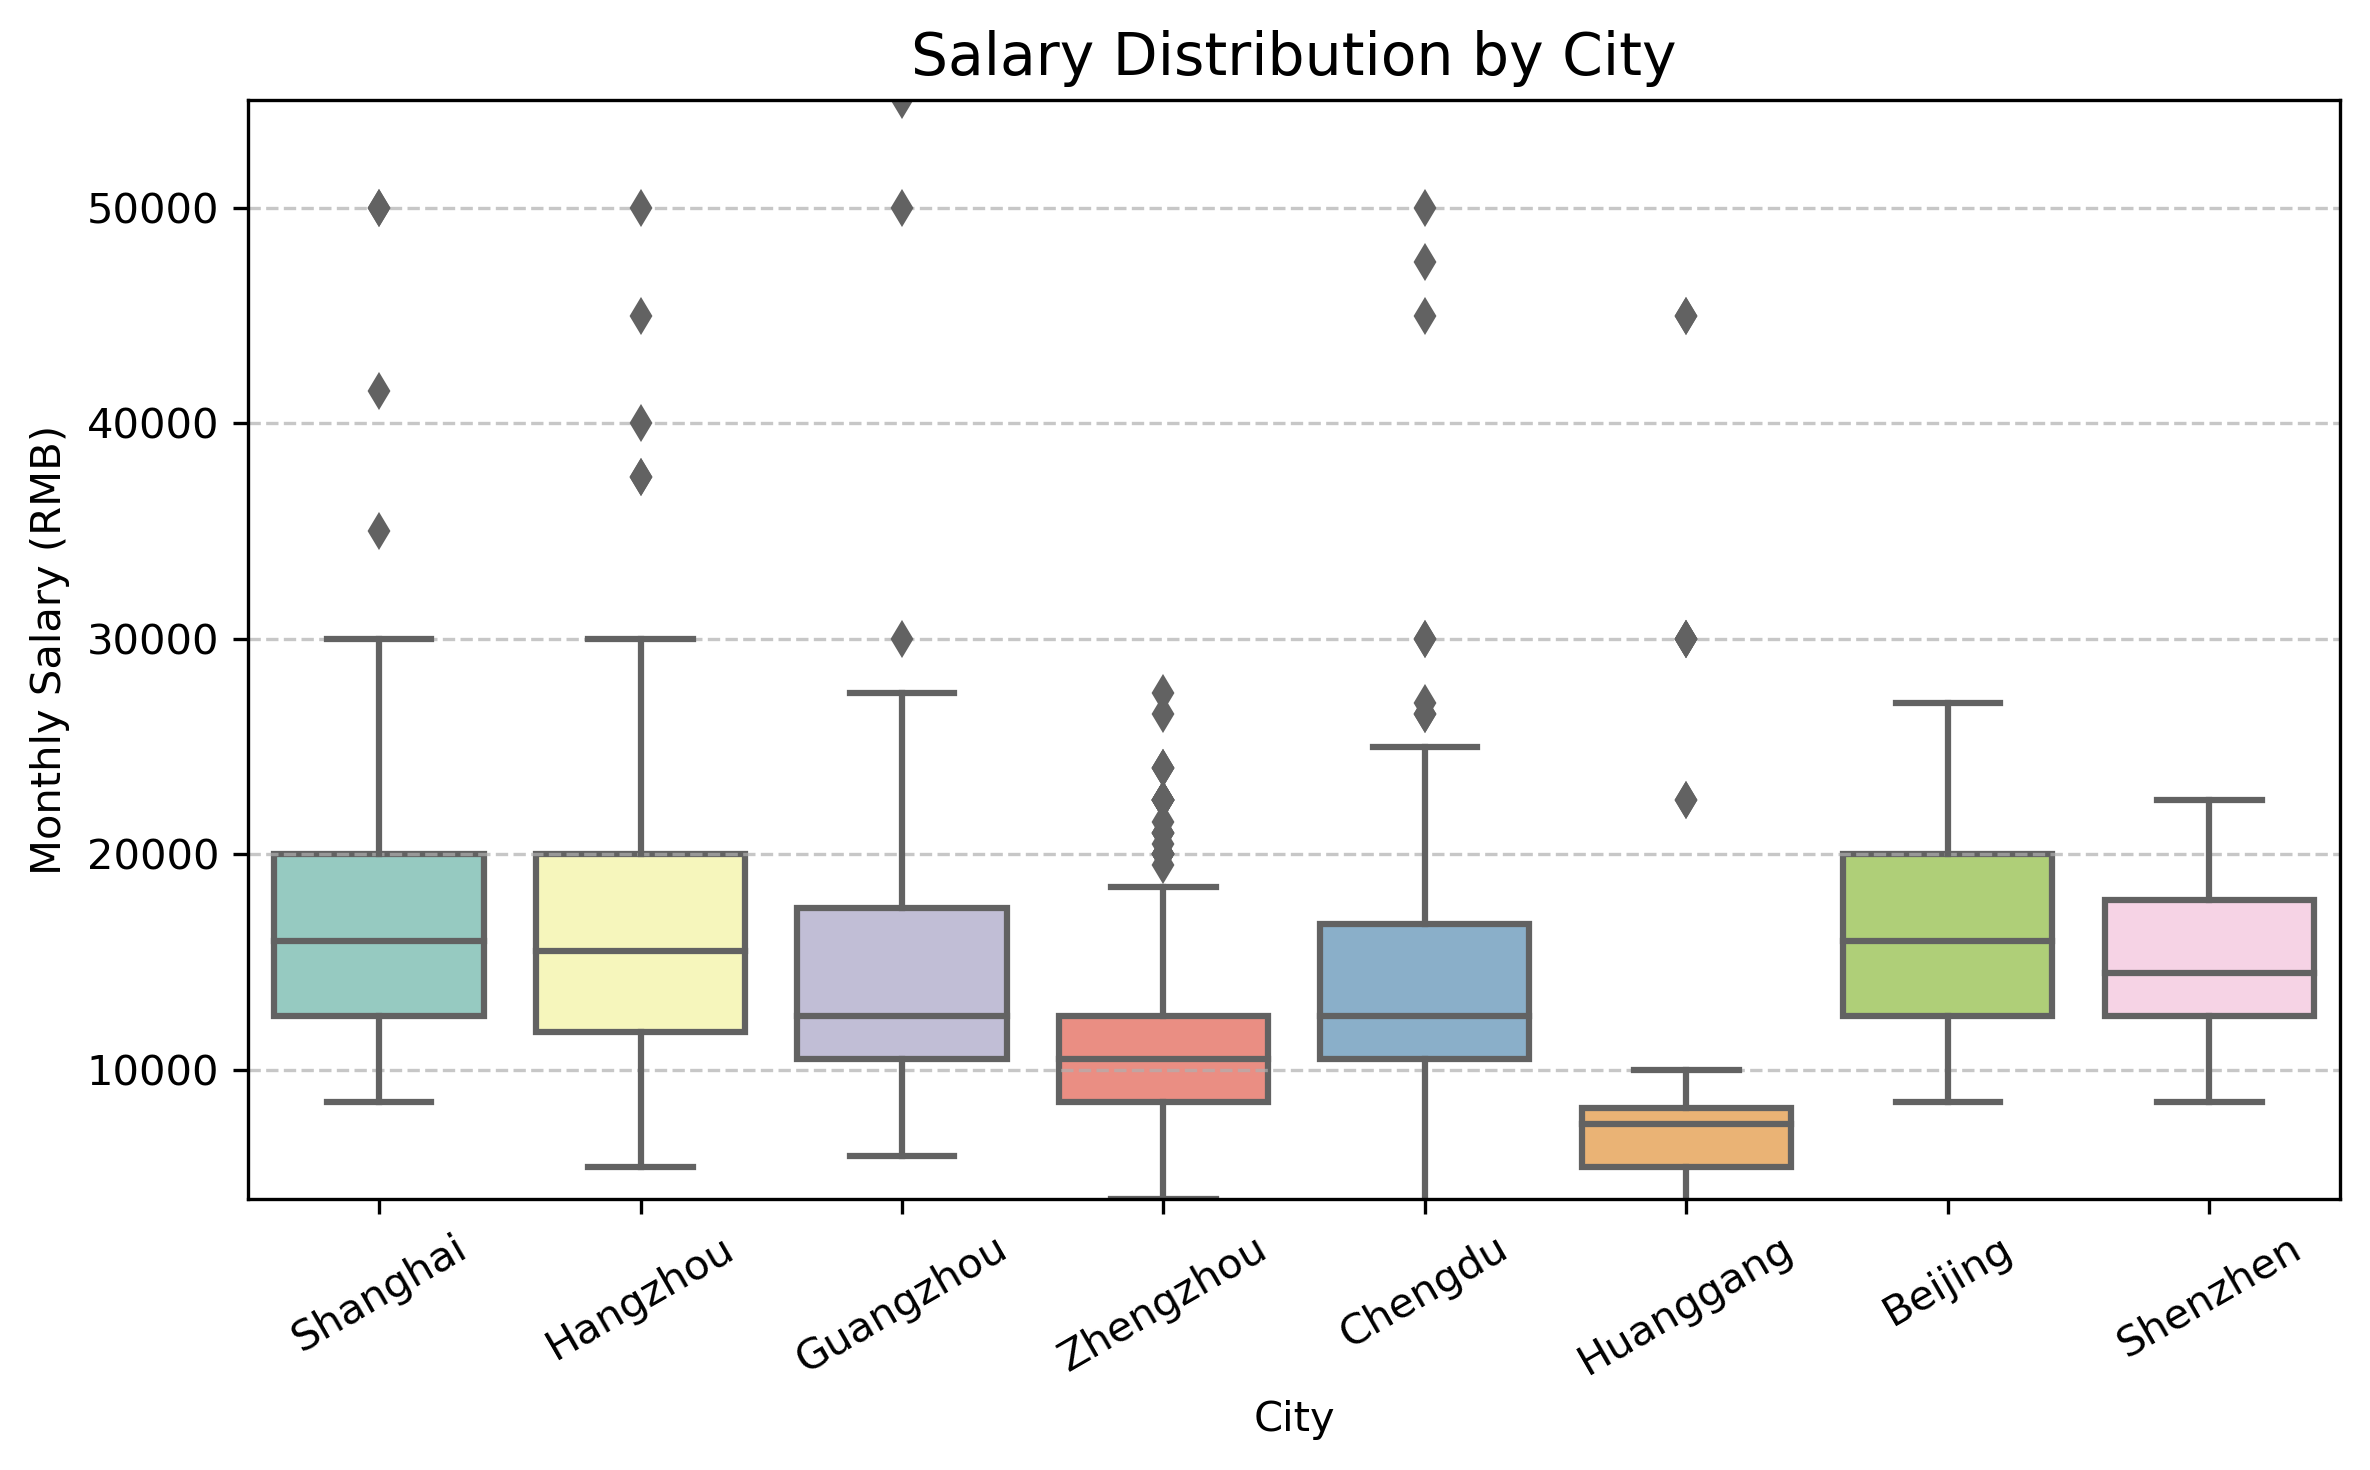

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(x='city_name', y='monthly_salary_avg', data=df, palette='Set3')
plt.title("Salary Distribution by City", fontsize=14)
plt.xlabel("City")
plt.ylabel("Monthly Salary (RMB)")
plt.ylim(4000, df['monthly_salary_avg'].max()) 
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

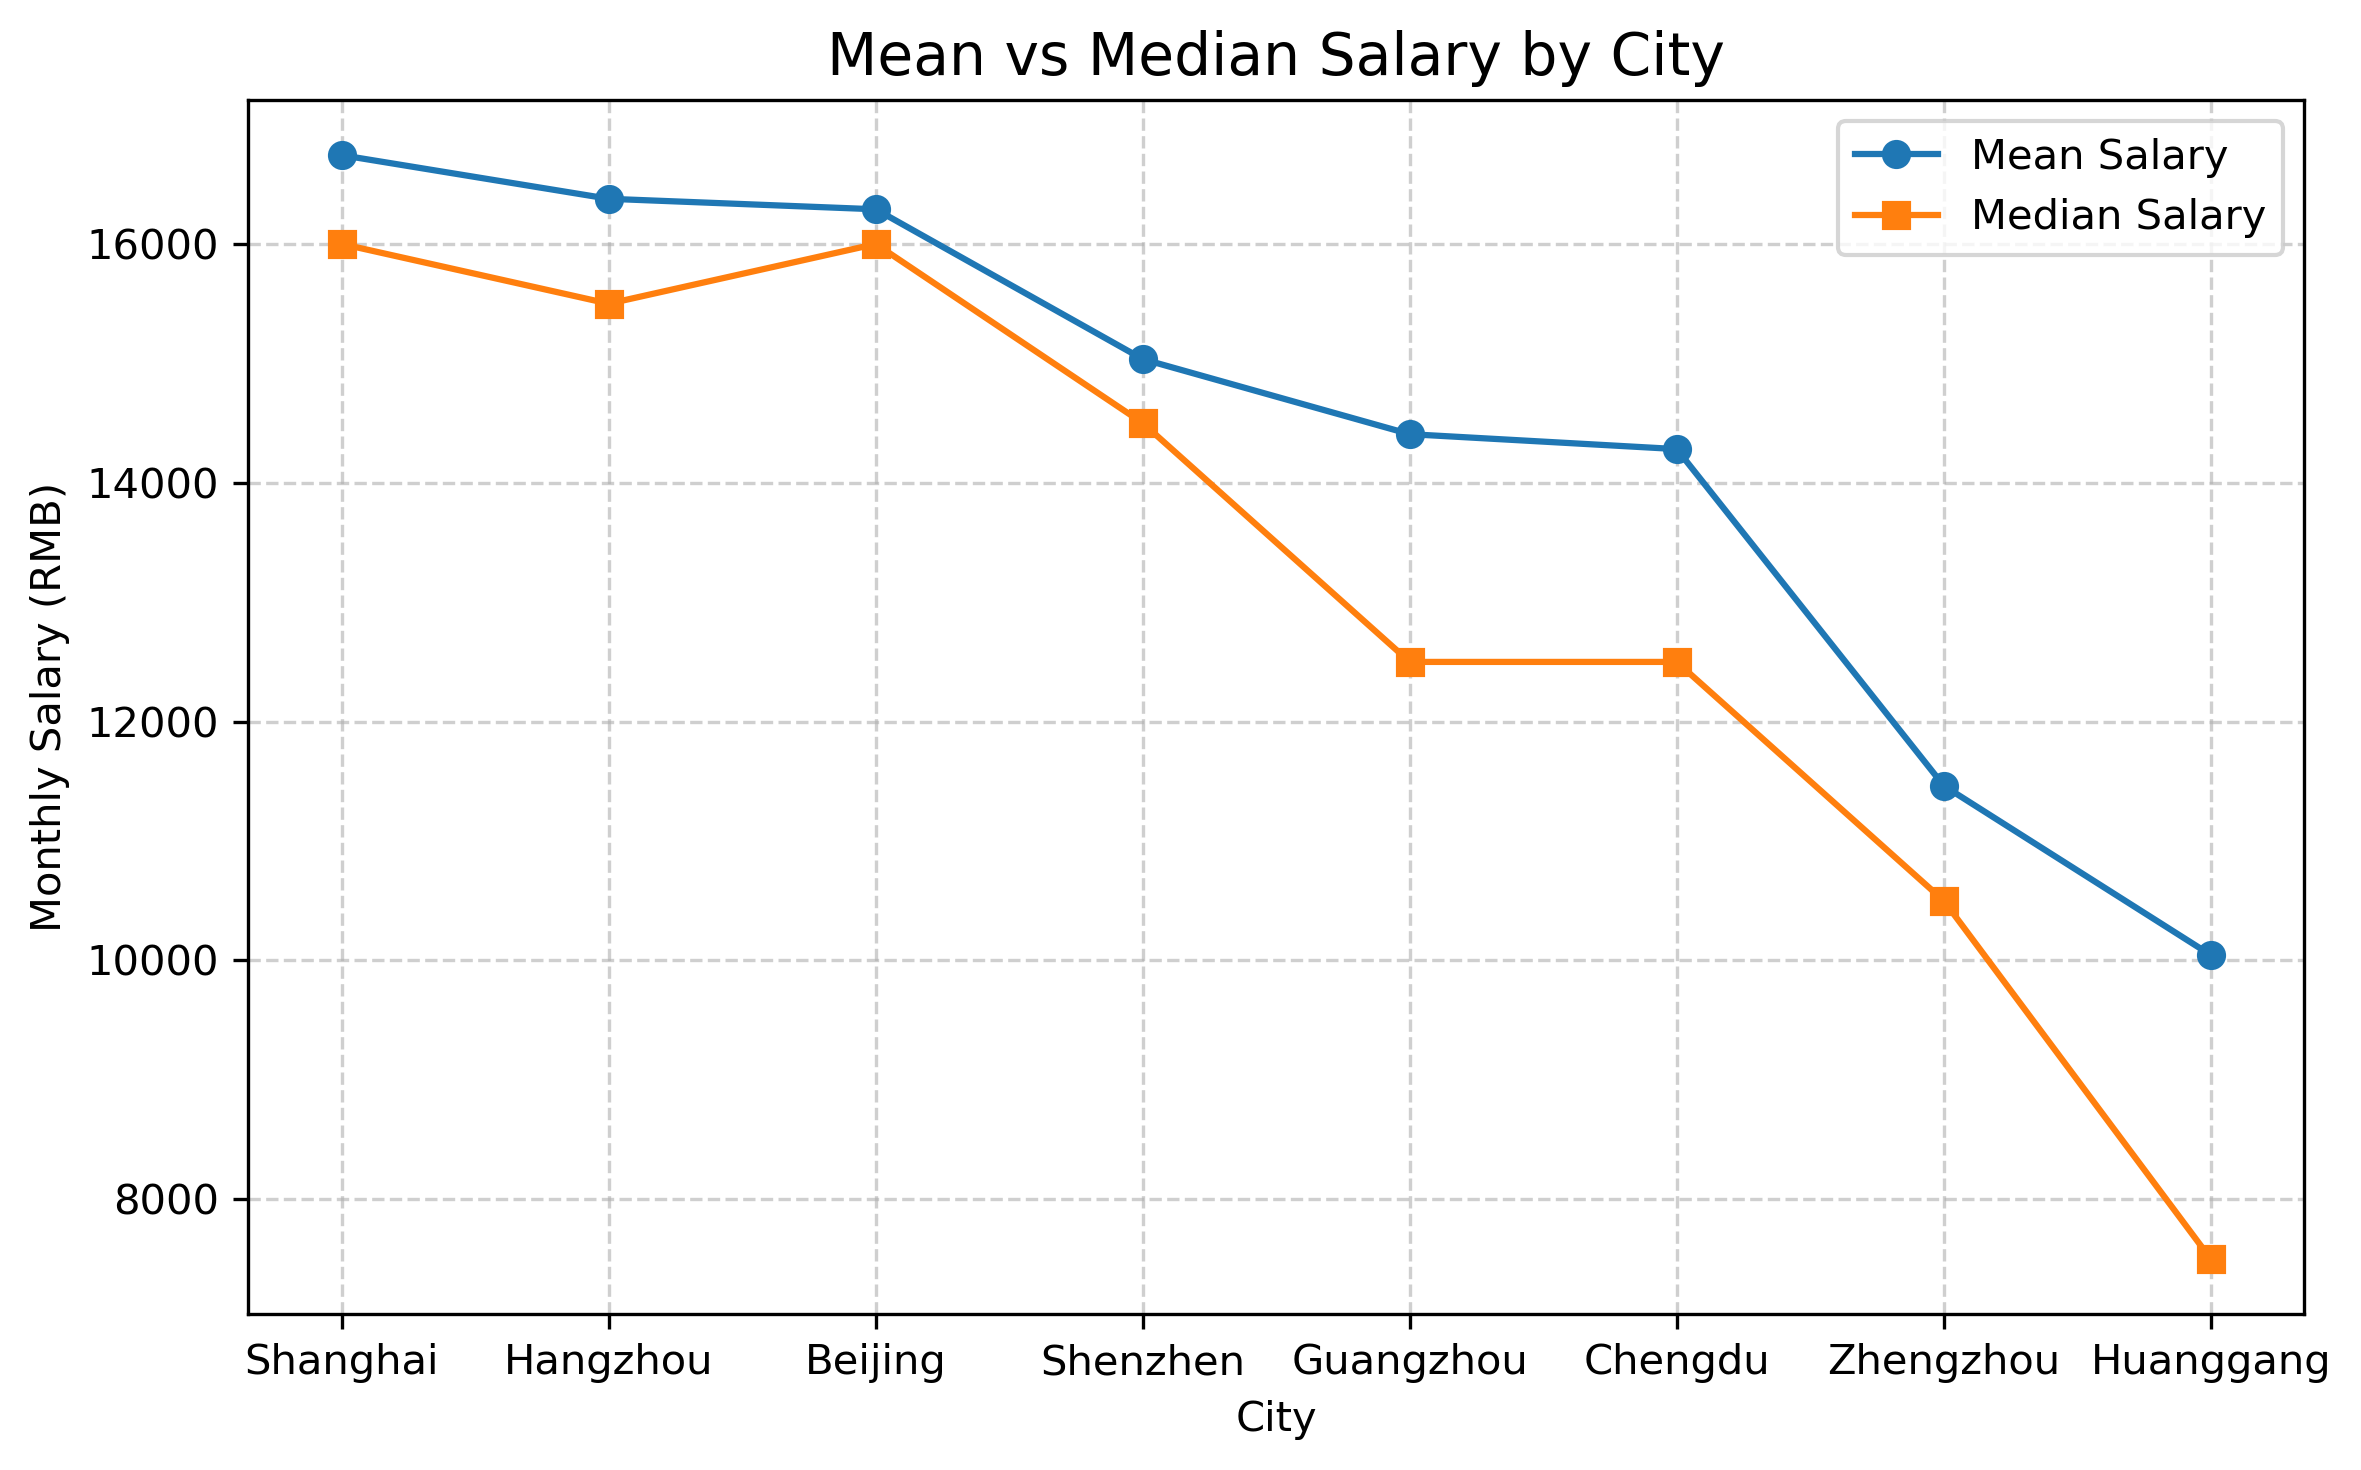

In [35]:
agg_city = df.groupby('city_name')['monthly_salary_avg'].agg(['mean','median']).reset_index()
agg_city = agg_city.sort_values('mean', ascending=False)

plt.figure(figsize=(8,5))
plt.plot(agg_city['city_name'], agg_city['mean'], marker='o', label='Mean Salary')
plt.plot(agg_city['city_name'], agg_city['median'], marker='s', label='Median Salary')
plt.title("Mean vs Median Salary by City", fontsize=14)
plt.xlabel("City")
plt.ylabel("Monthly Salary (RMB)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

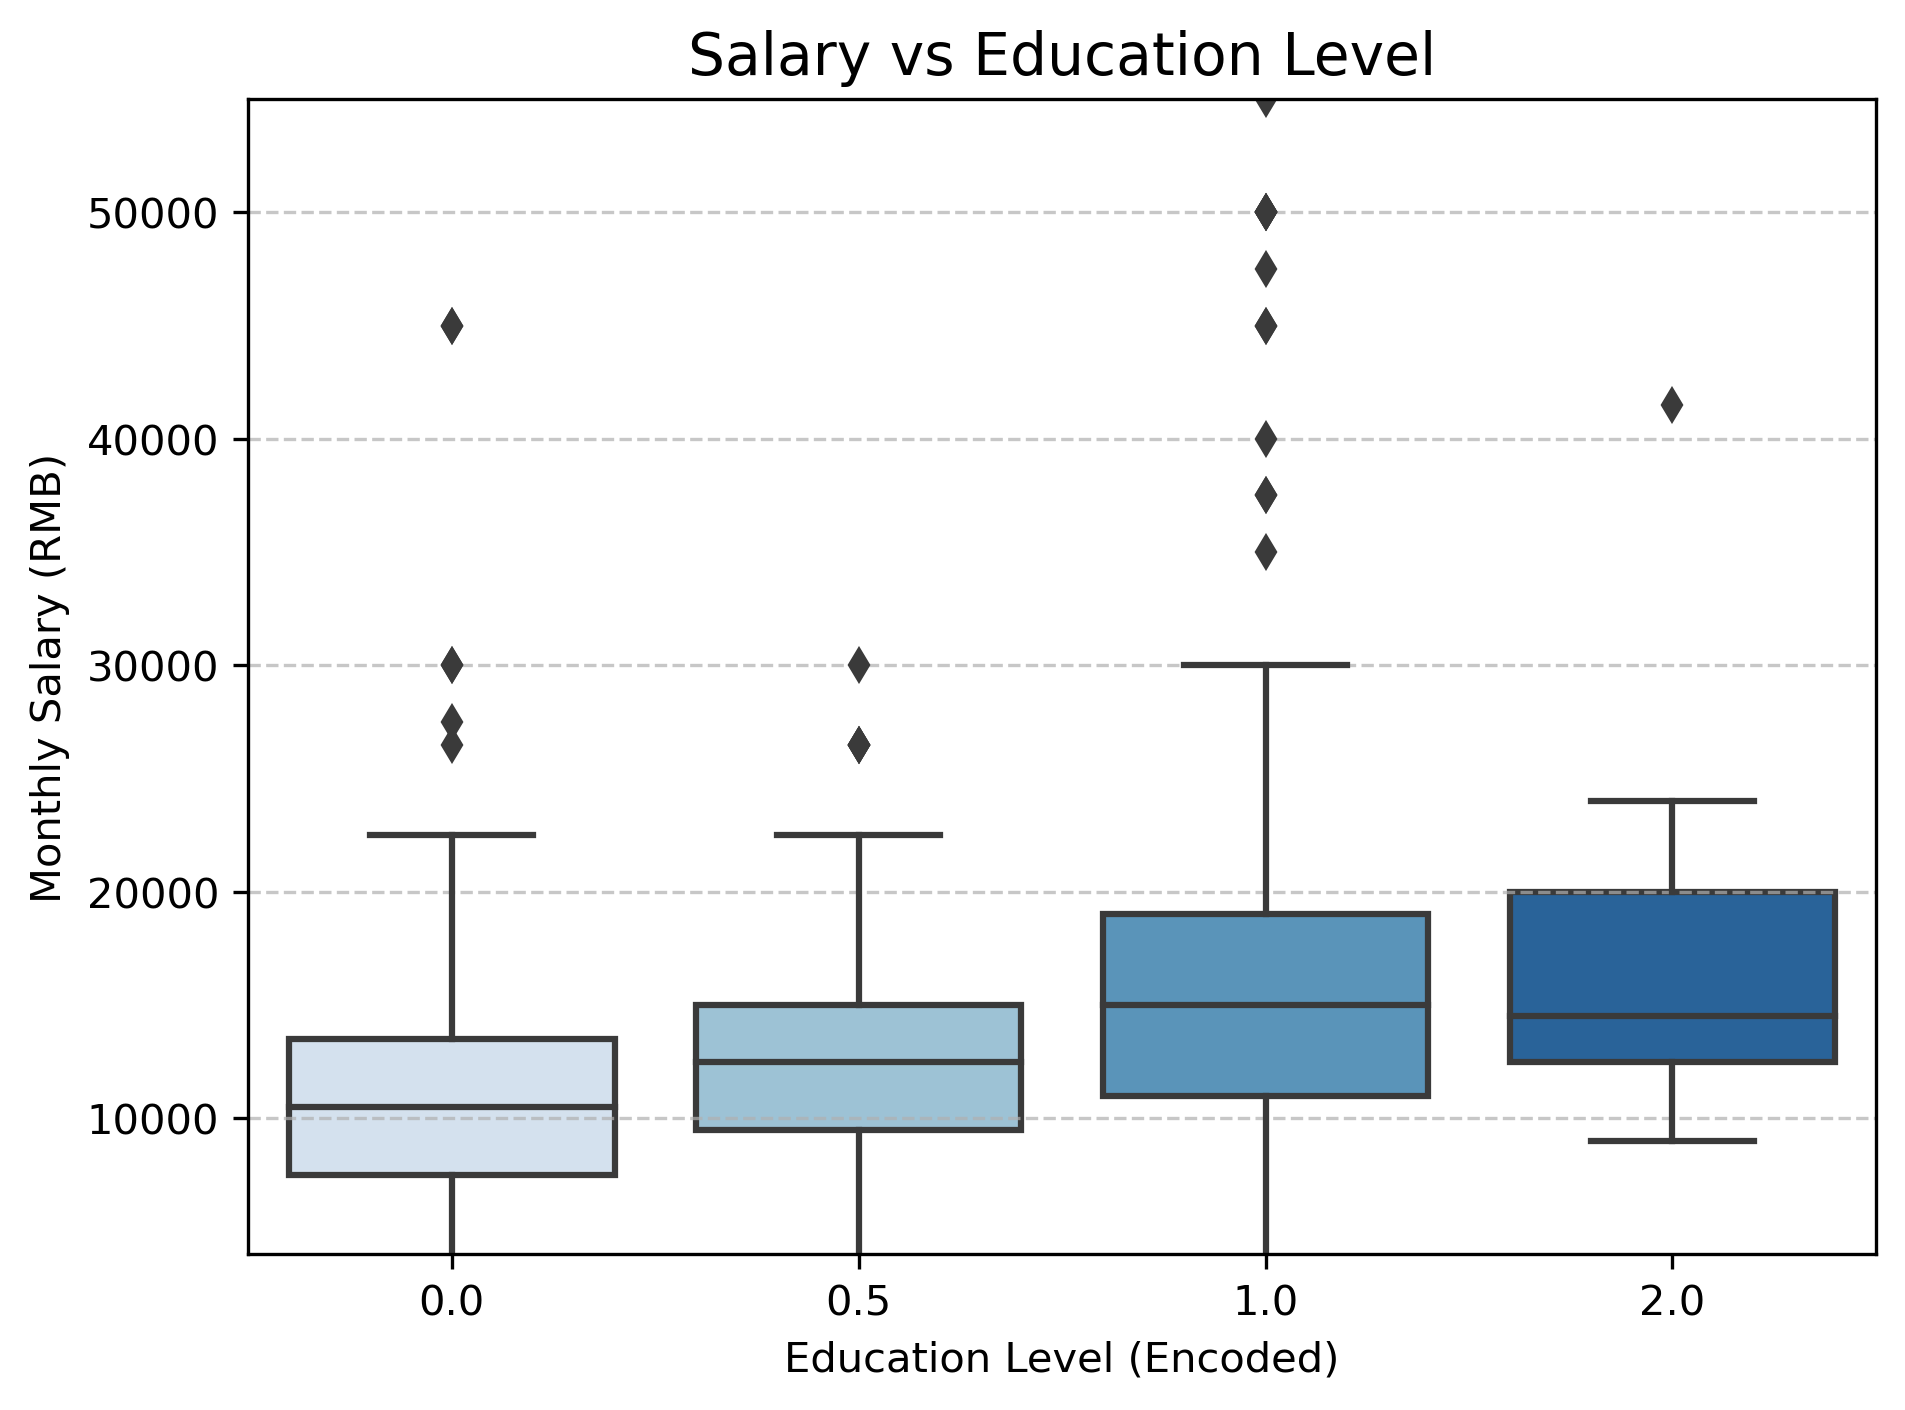

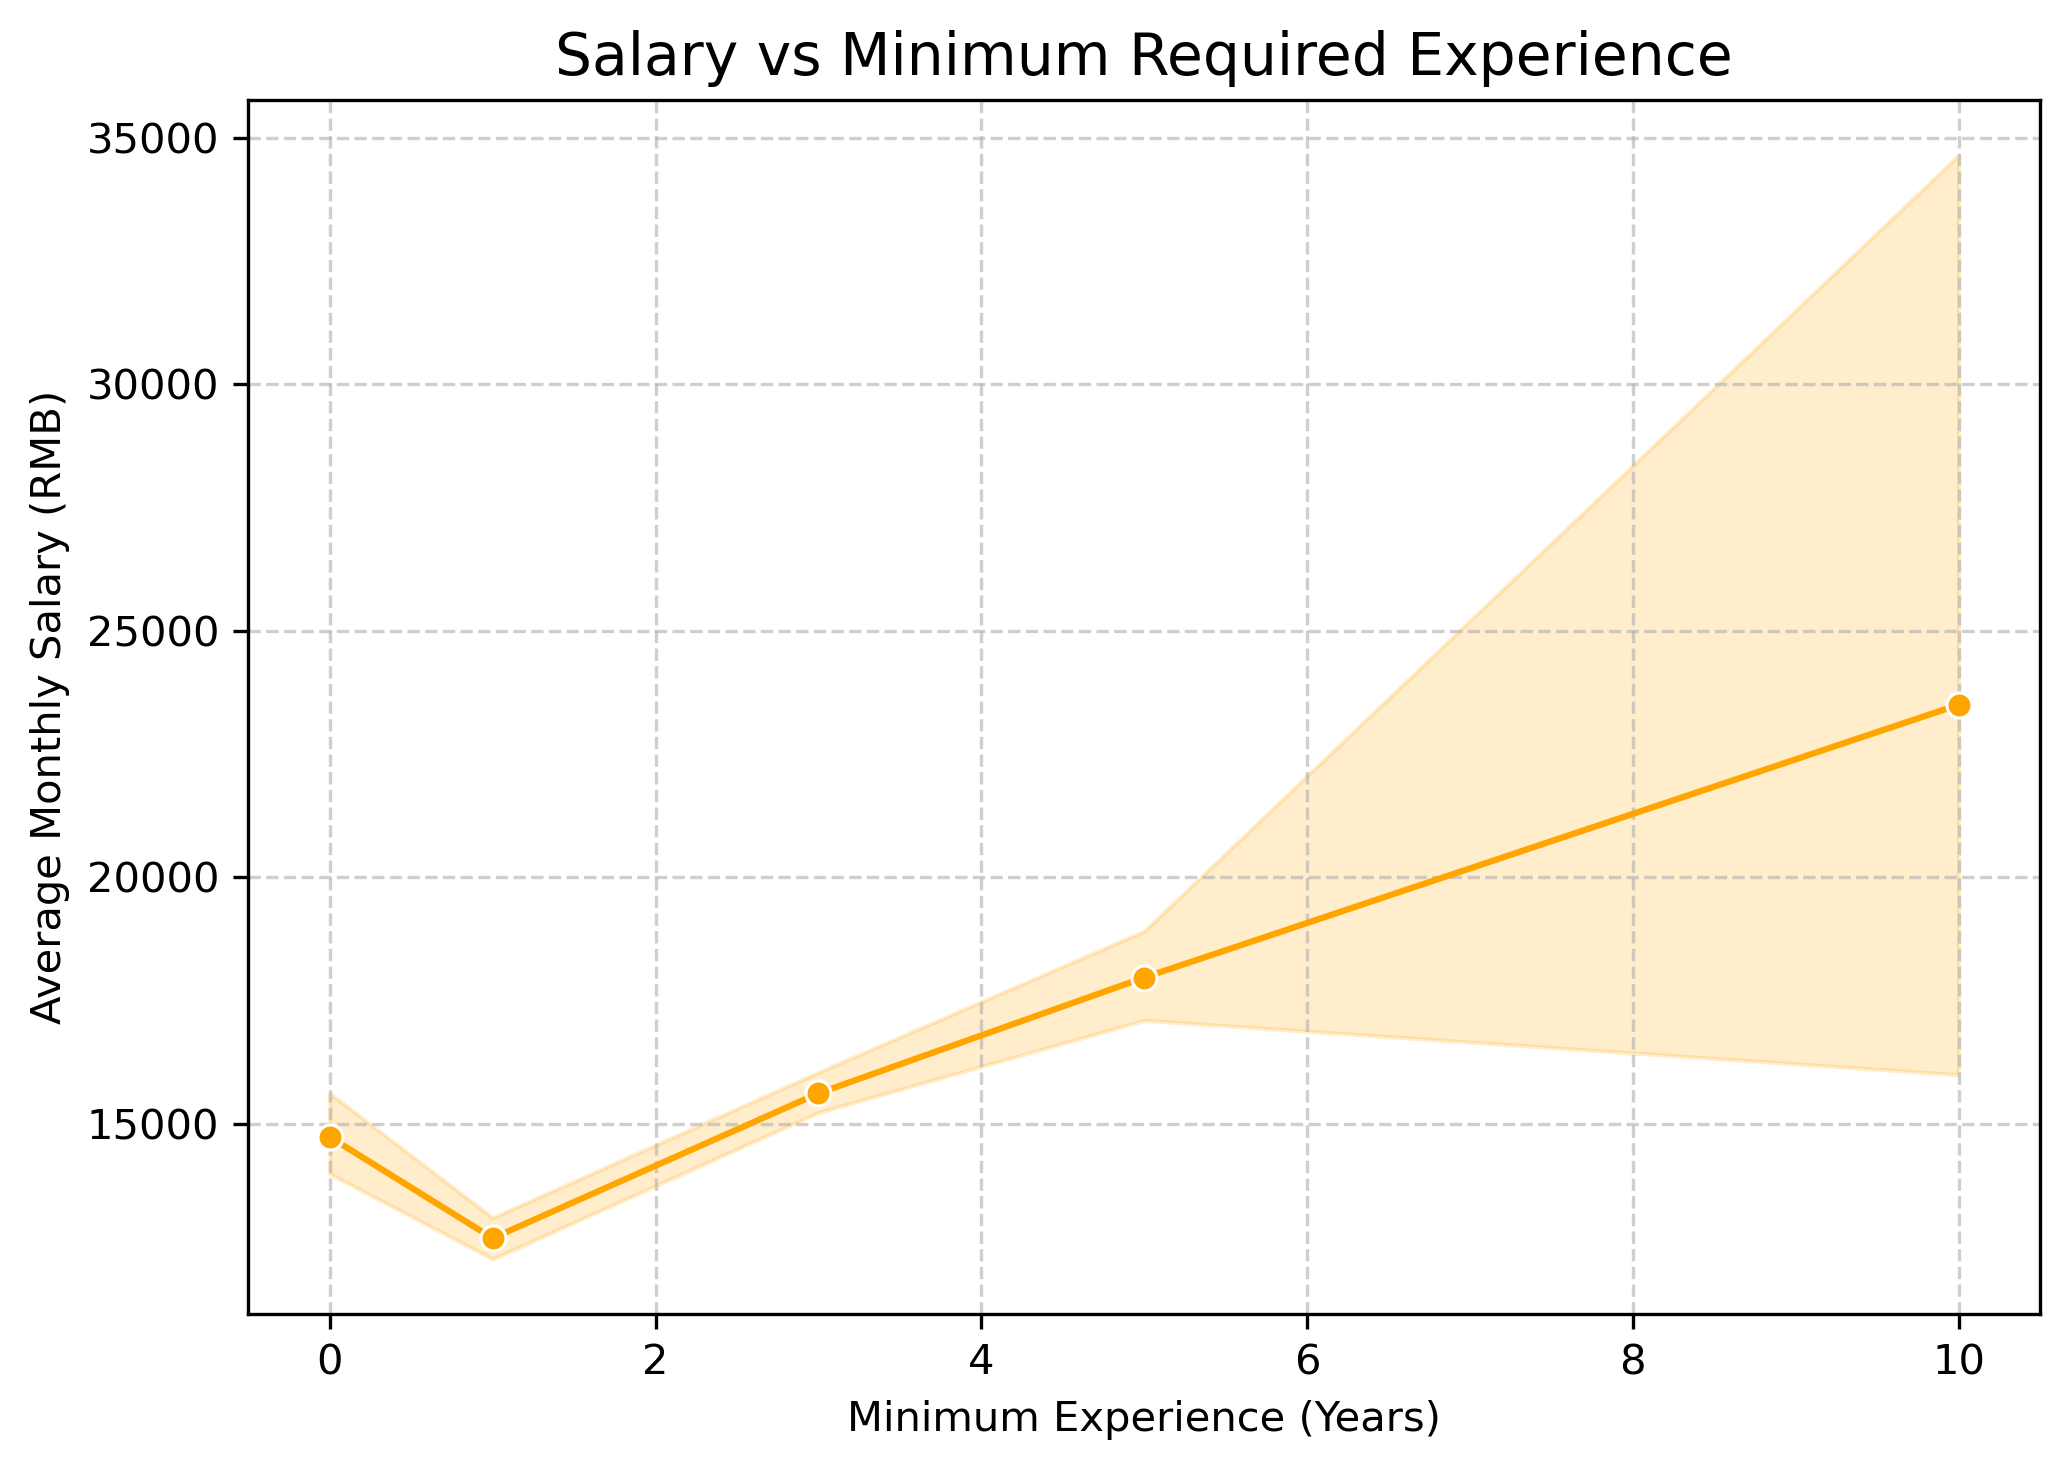

In [36]:
plt.figure(figsize=(7,5))
sns.boxplot(x='education', y='monthly_salary_avg', data=df, palette='Blues')
plt.title("Salary vs Education Level", fontsize=14)
plt.xlabel("Education Level (Encoded)")
plt.ylabel("Monthly Salary (RMB)")
plt.ylim(4000, df['monthly_salary_avg'].max())
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(7,5))
sns.lineplot(x='experience_atleast', y='monthly_salary_avg', data=df, marker='o', color='orange')
plt.title("Salary vs Minimum Required Experience", fontsize=14)
plt.xlabel("Minimum Experience (Years)")
plt.ylabel("Average Monthly Salary (RMB)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


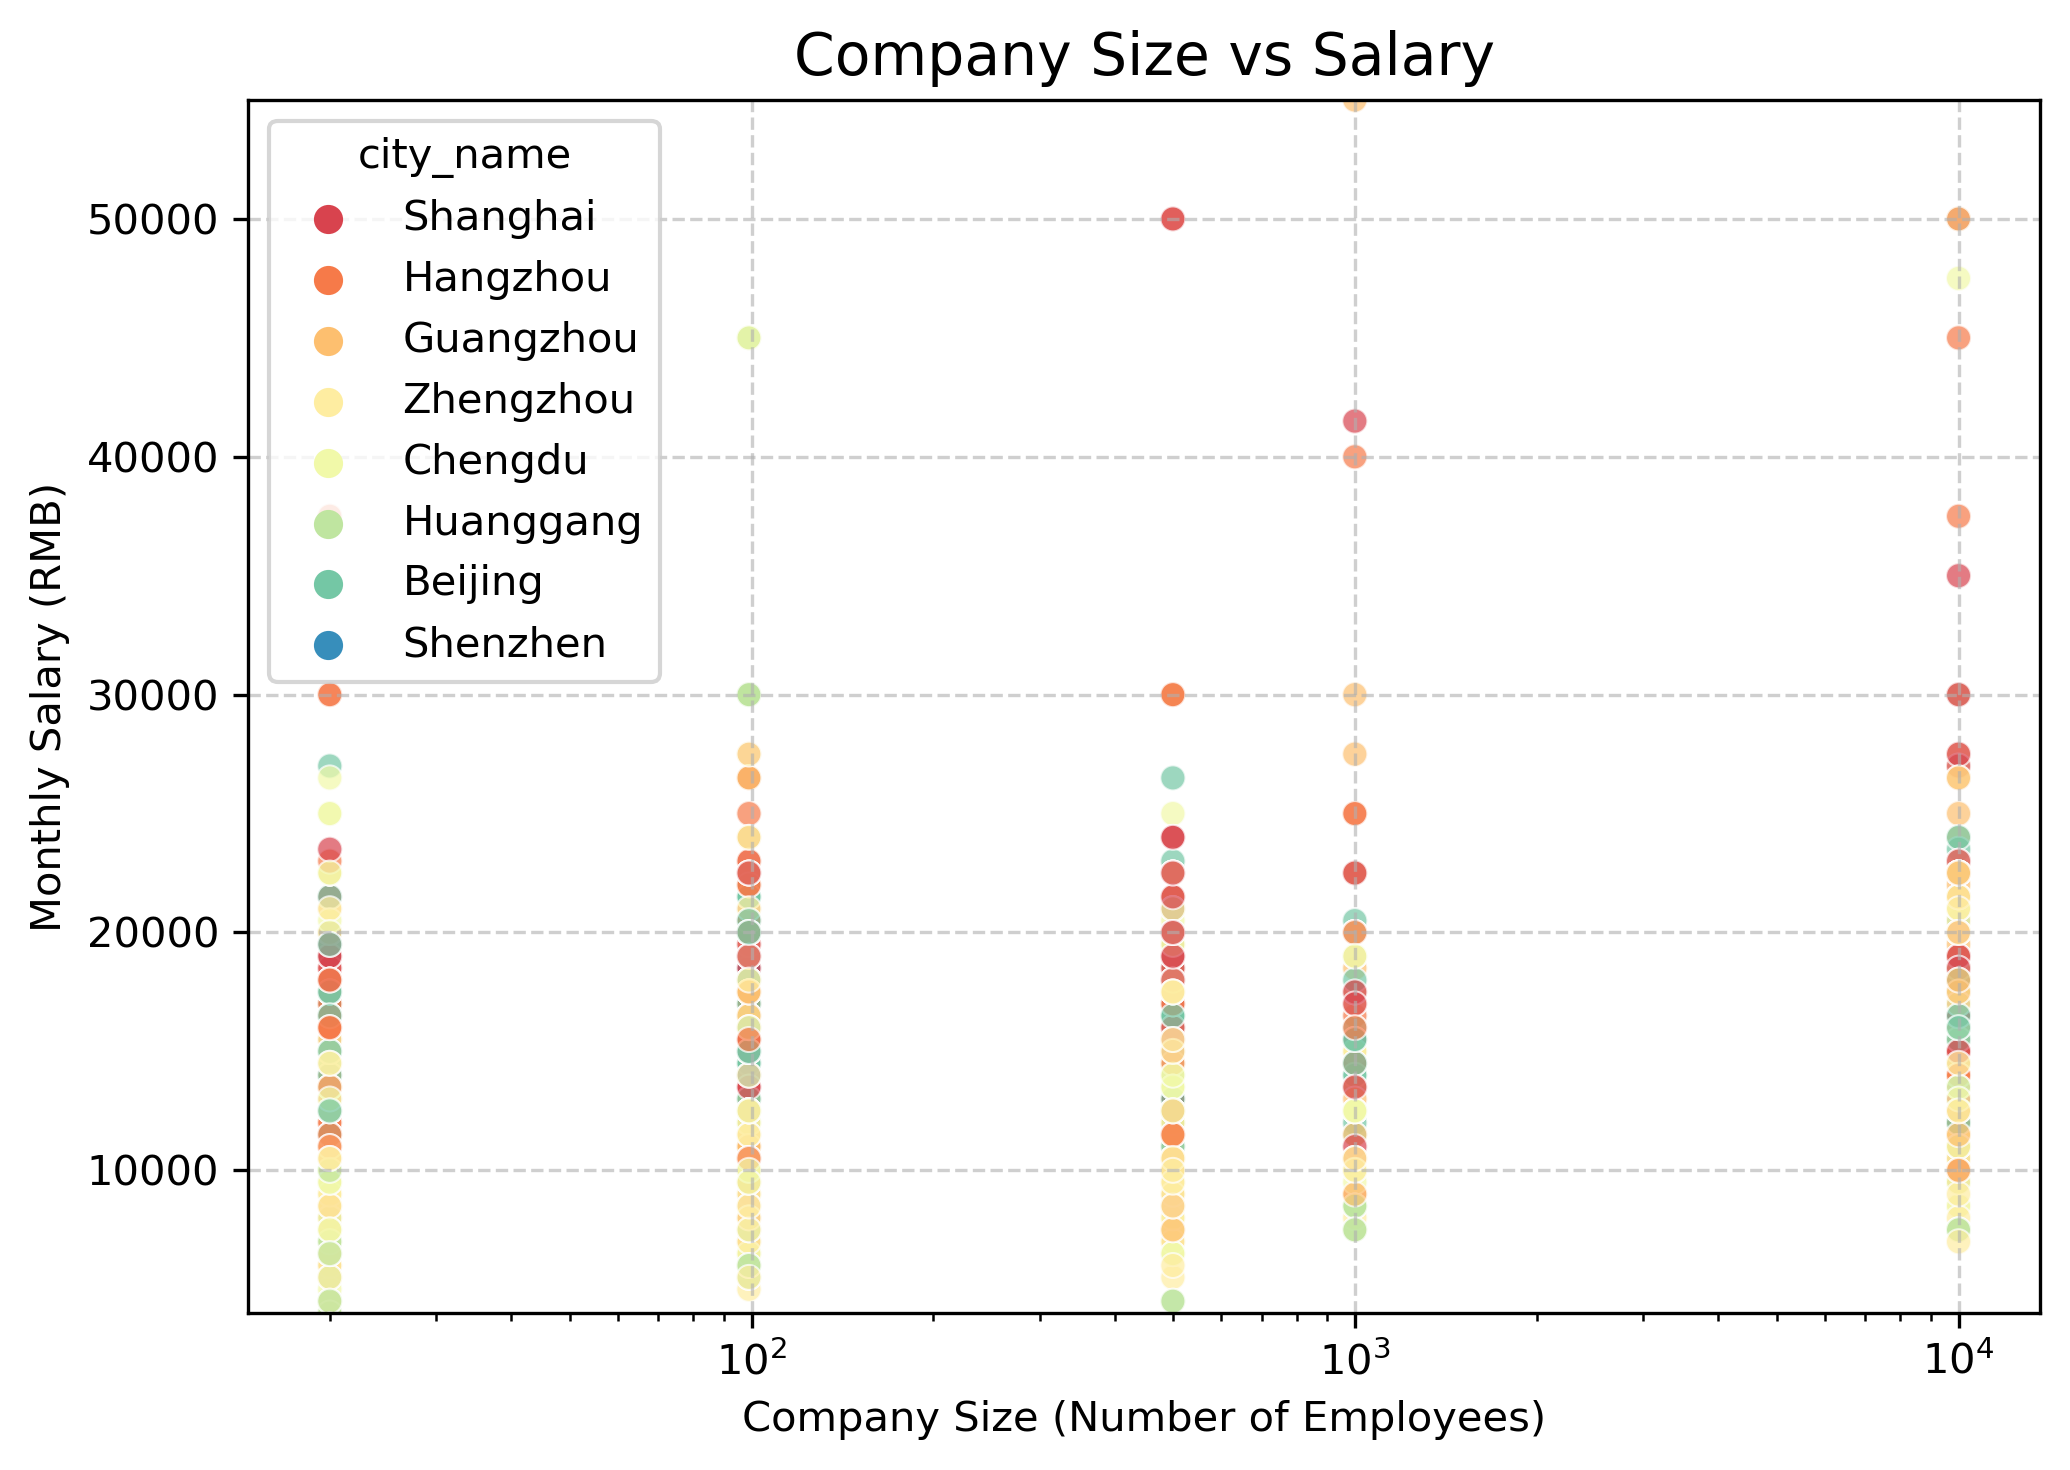

In [37]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='size(employees_number)', y='monthly_salary_avg', data=df, hue='city_name', palette='Spectral', alpha=0.7)
plt.title("Company Size vs Salary", fontsize=14)
plt.xlabel("Company Size (Number of Employees)")
plt.ylabel("Monthly Salary (RMB)")
plt.xscale('log')  
plt.ylim(4000, df['monthly_salary_avg'].max())
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

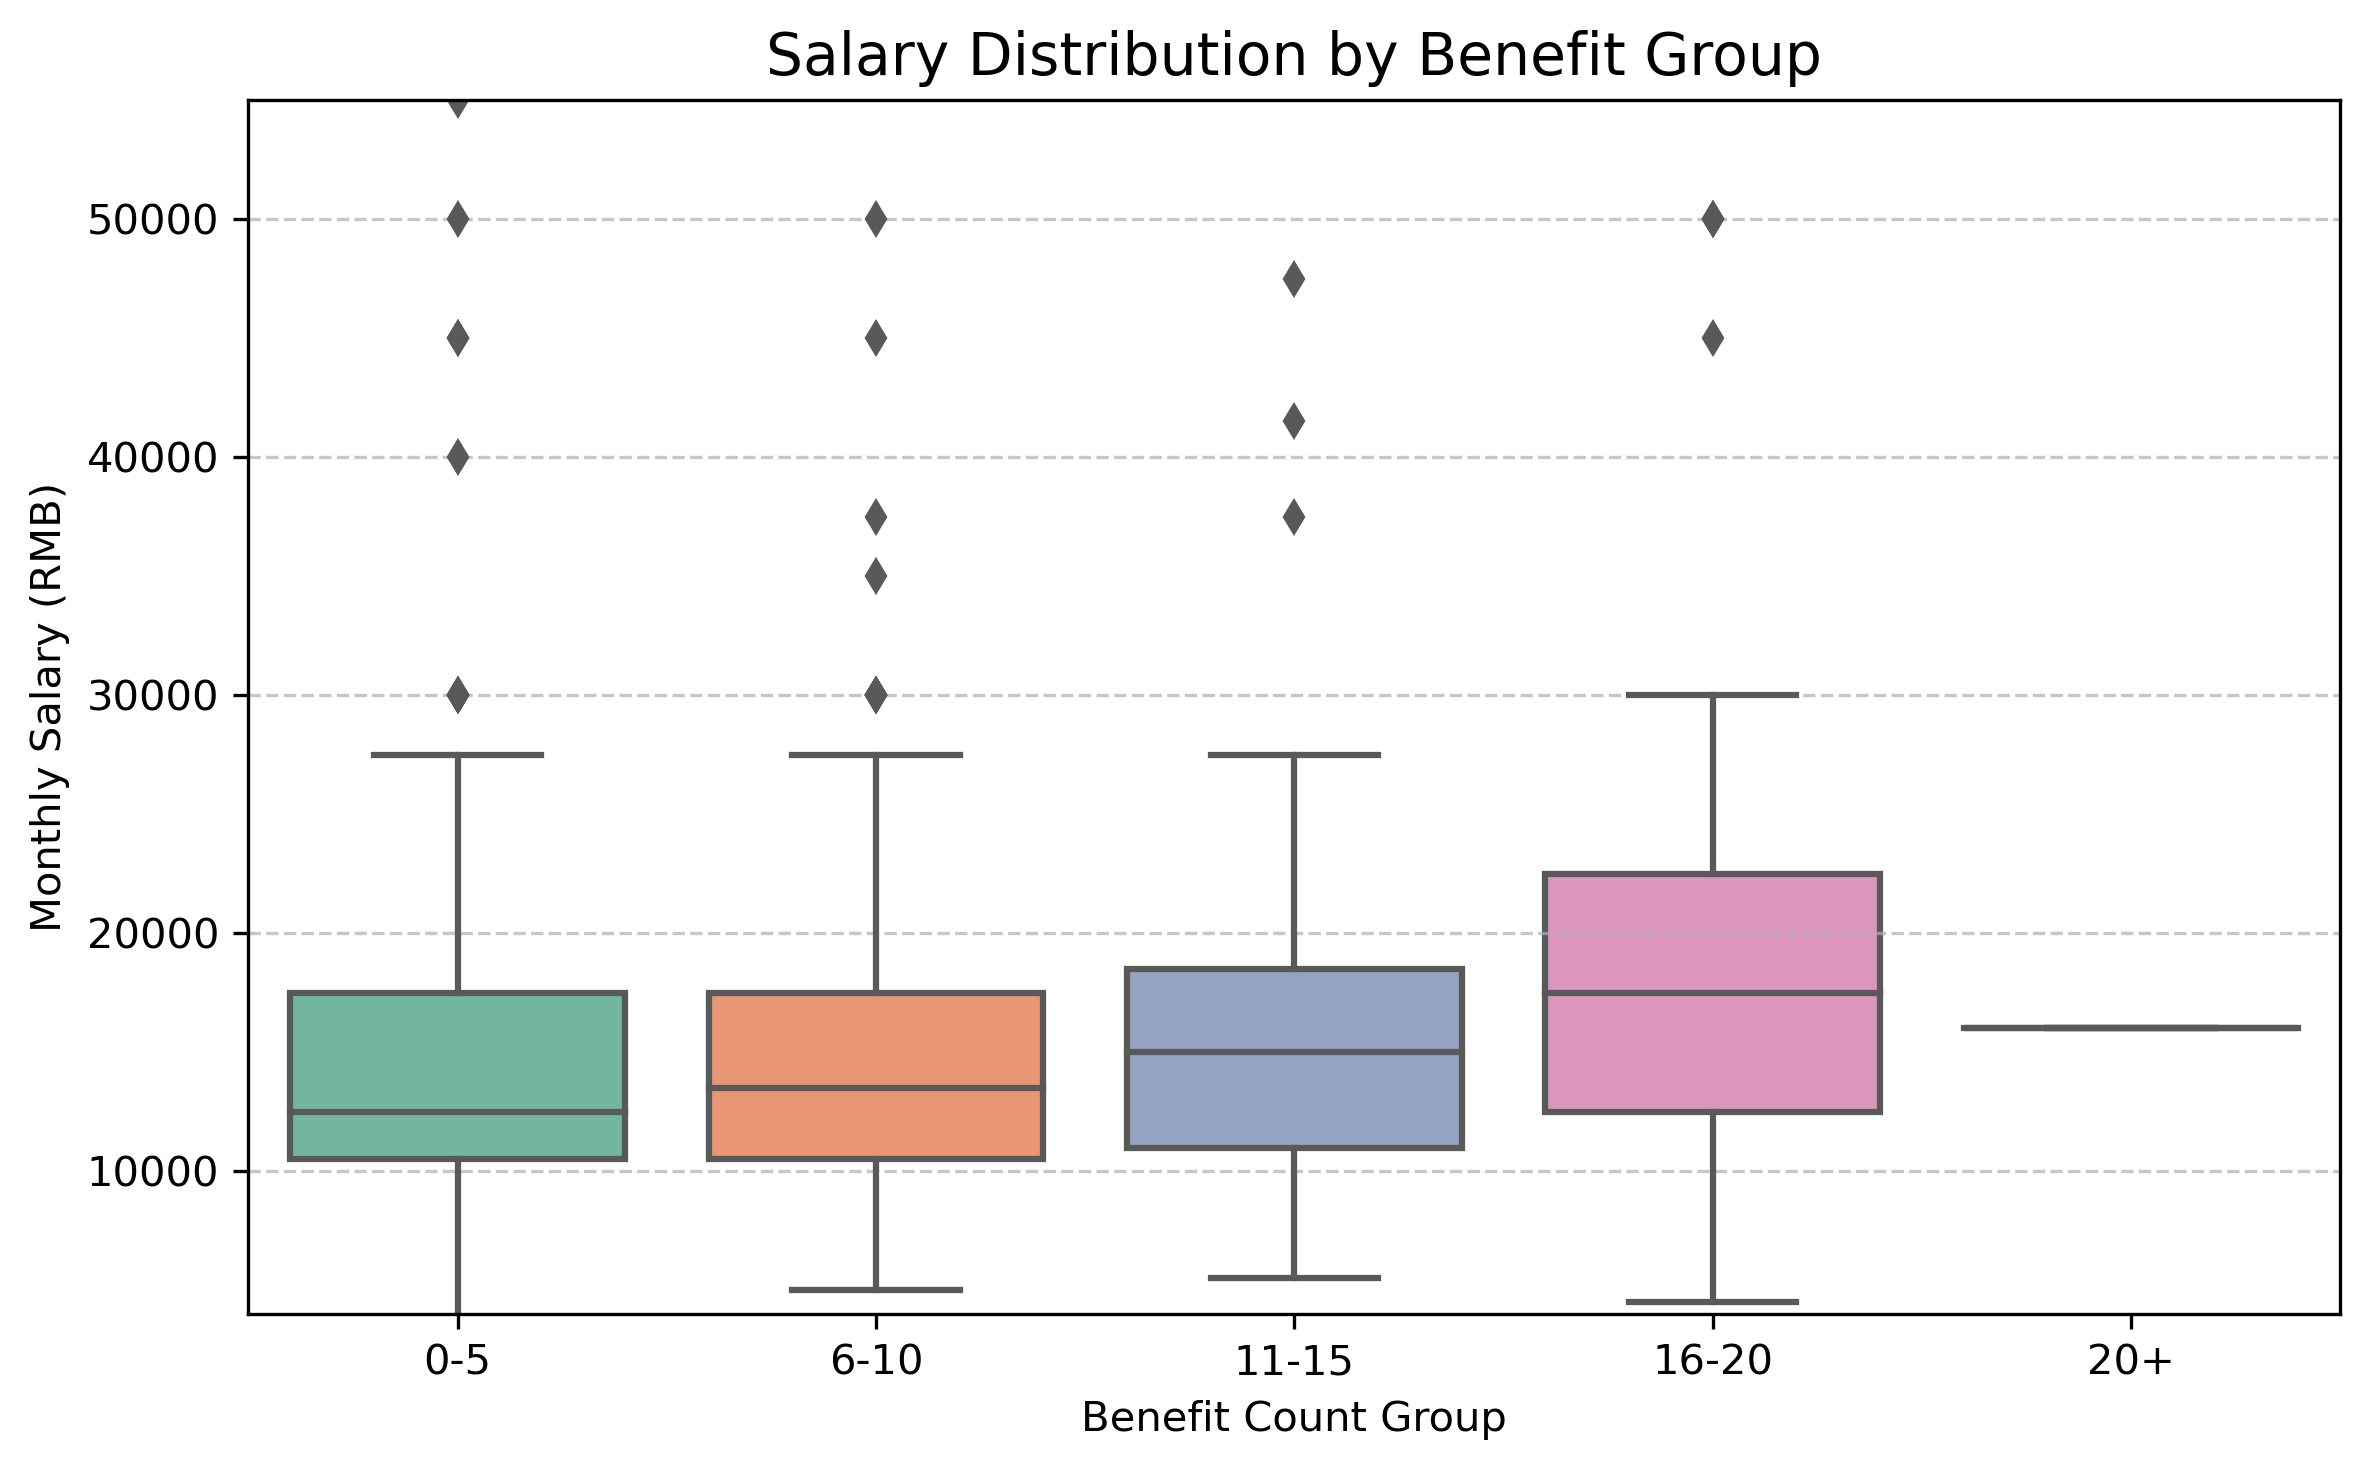

In [38]:
df['benefit_group'] = pd.cut(
    df['benifit'],
    bins=[-1,5,10,15,20,50],
    labels=['0-5','6-10','11-15','16-20','20+']
)

plt.figure(figsize=(8,5))
sns.boxplot(
    x='benefit_group',
    y='monthly_salary_avg',
    data=df,
    palette='Set2'
)
plt.title("Salary Distribution by Benefit Group", fontsize=14)
plt.xlabel("Benefit Count Group")
plt.ylabel("Monthly Salary (RMB)")
plt.ylim(4000, df['monthly_salary_avg'].max())
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

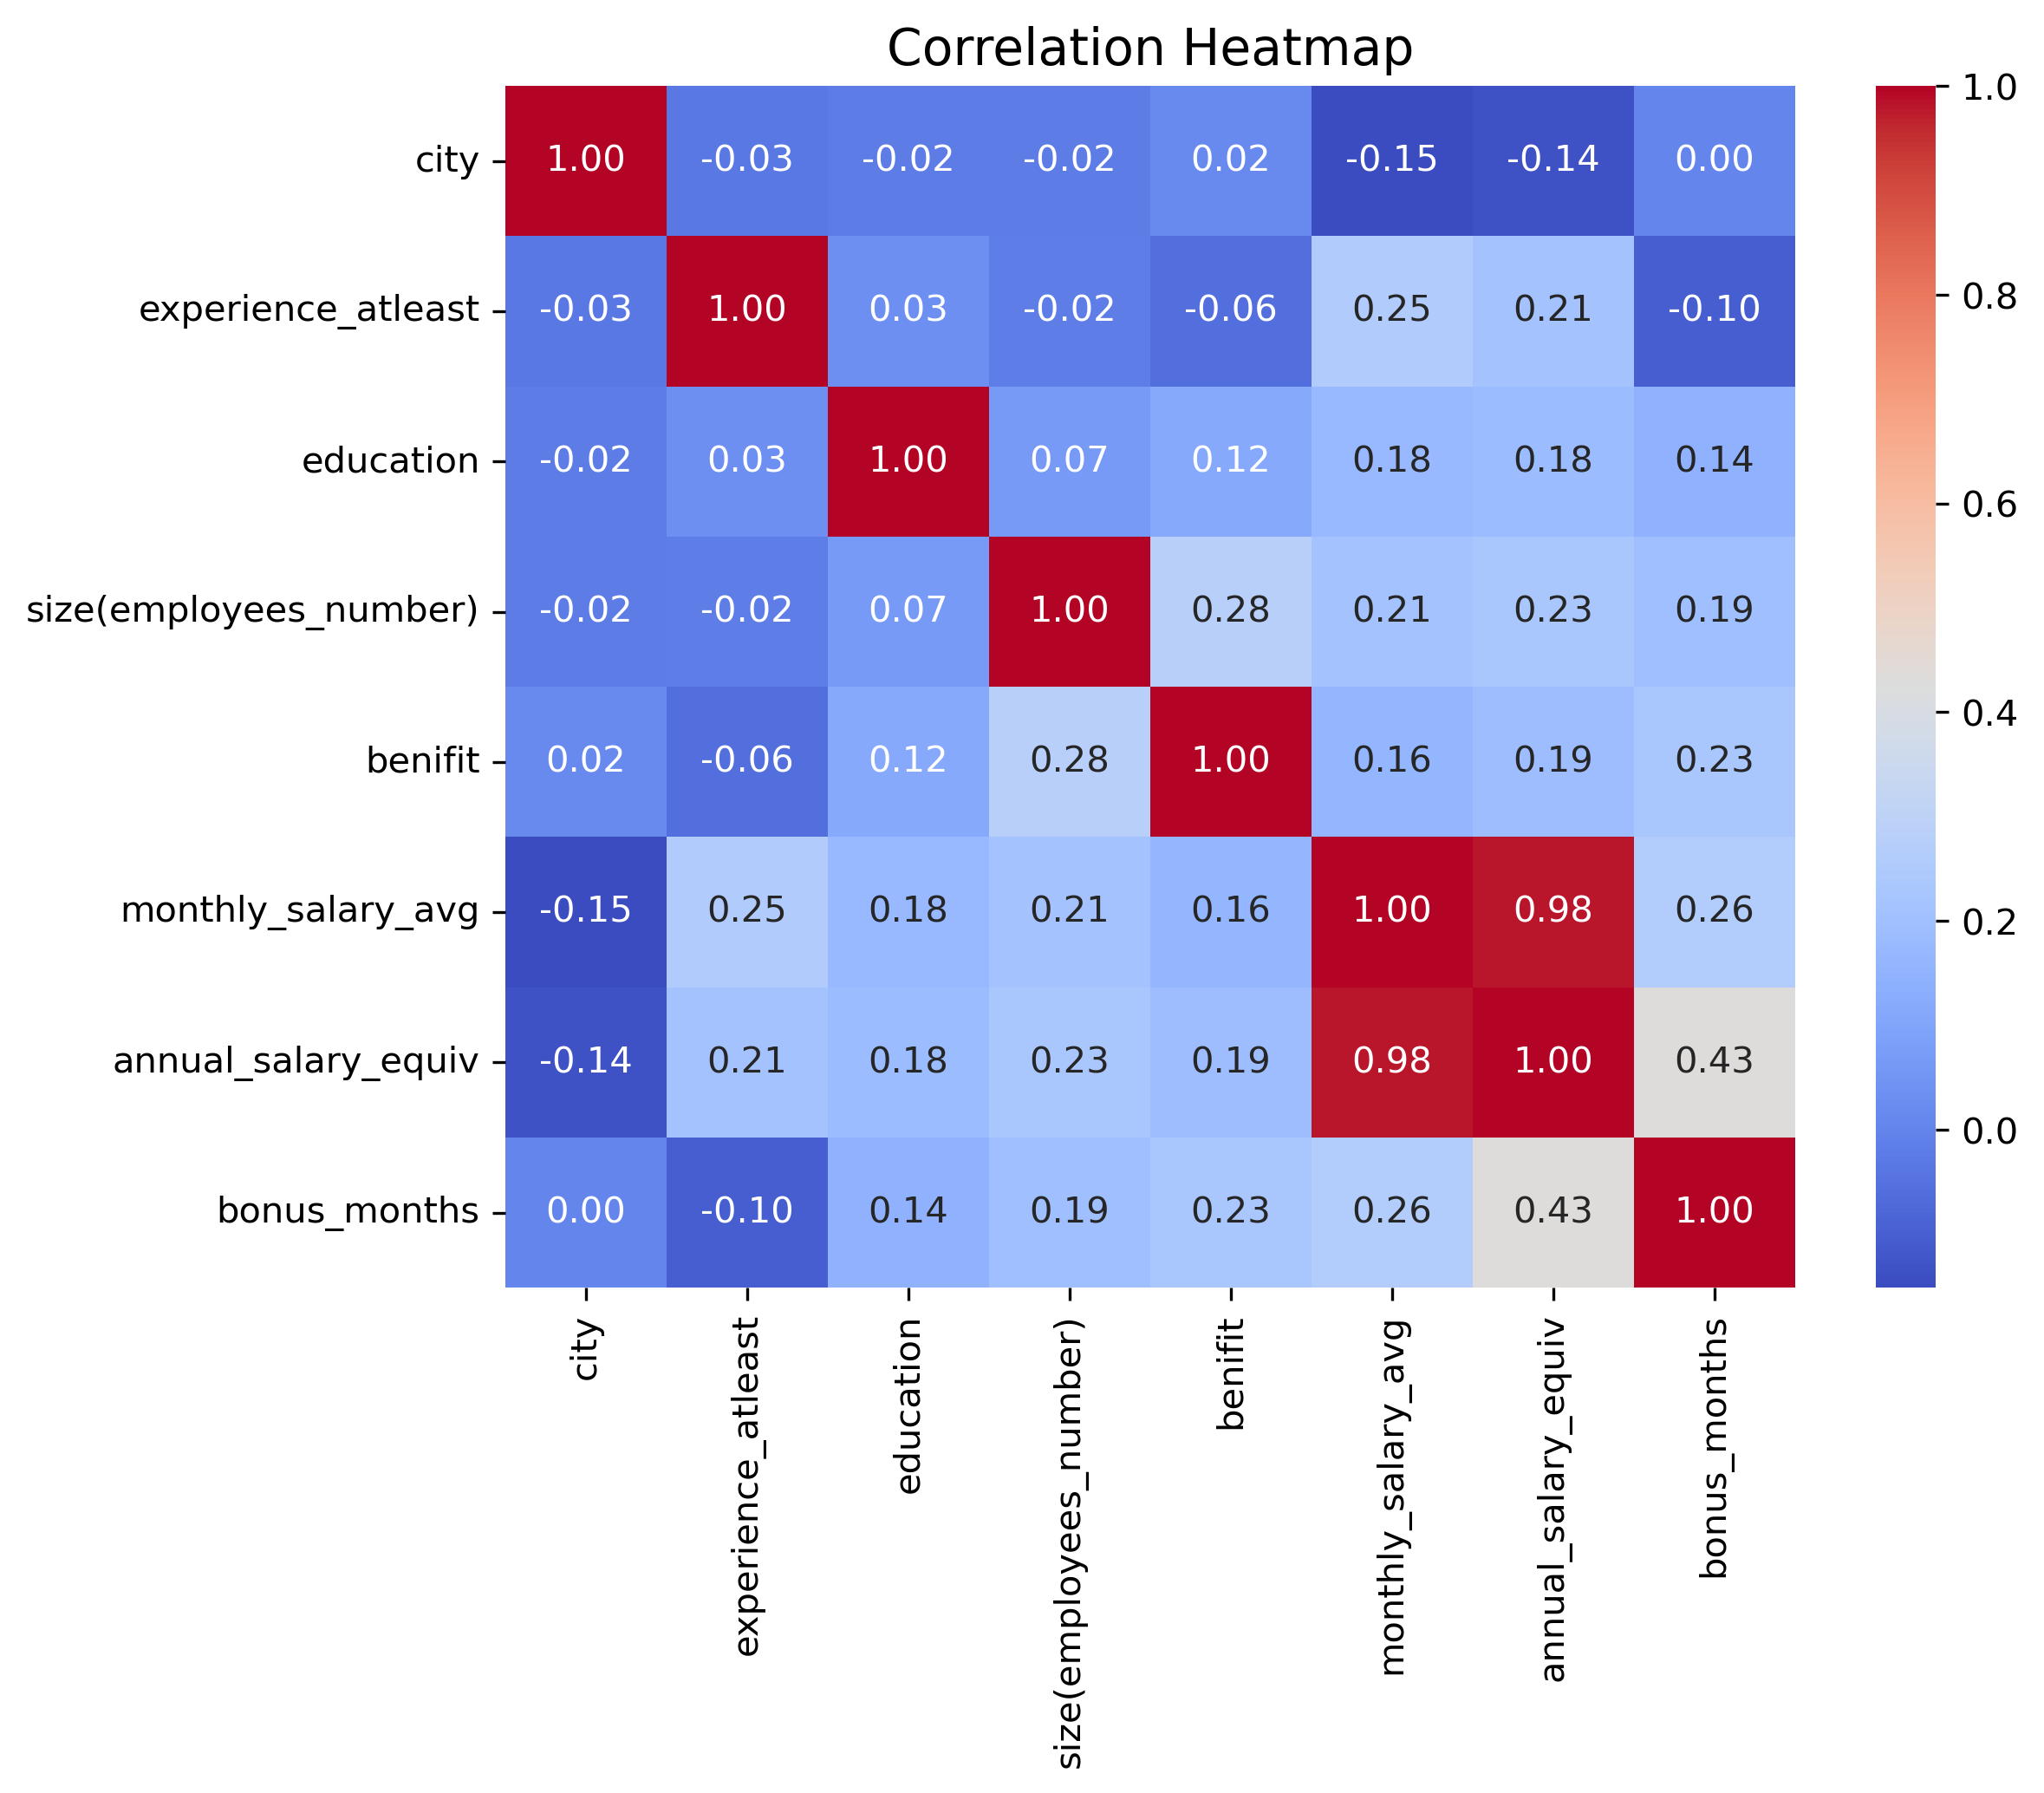

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

num_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 6))
sns.heatmap(num_df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


Detected position column：position_category

Average Salary Table by Position：
  position_category          mean   median  count
0              1_AI  16910.714286  15500.0    112
2            3_test  15940.000000  13500.0     25
1             2_dev  15026.631658  14000.0   1333
5            6_data  14186.746988  13500.0     83
4              5_PA  12553.191489  11500.0     47
3           4_train   8453.846154   8000.0     65


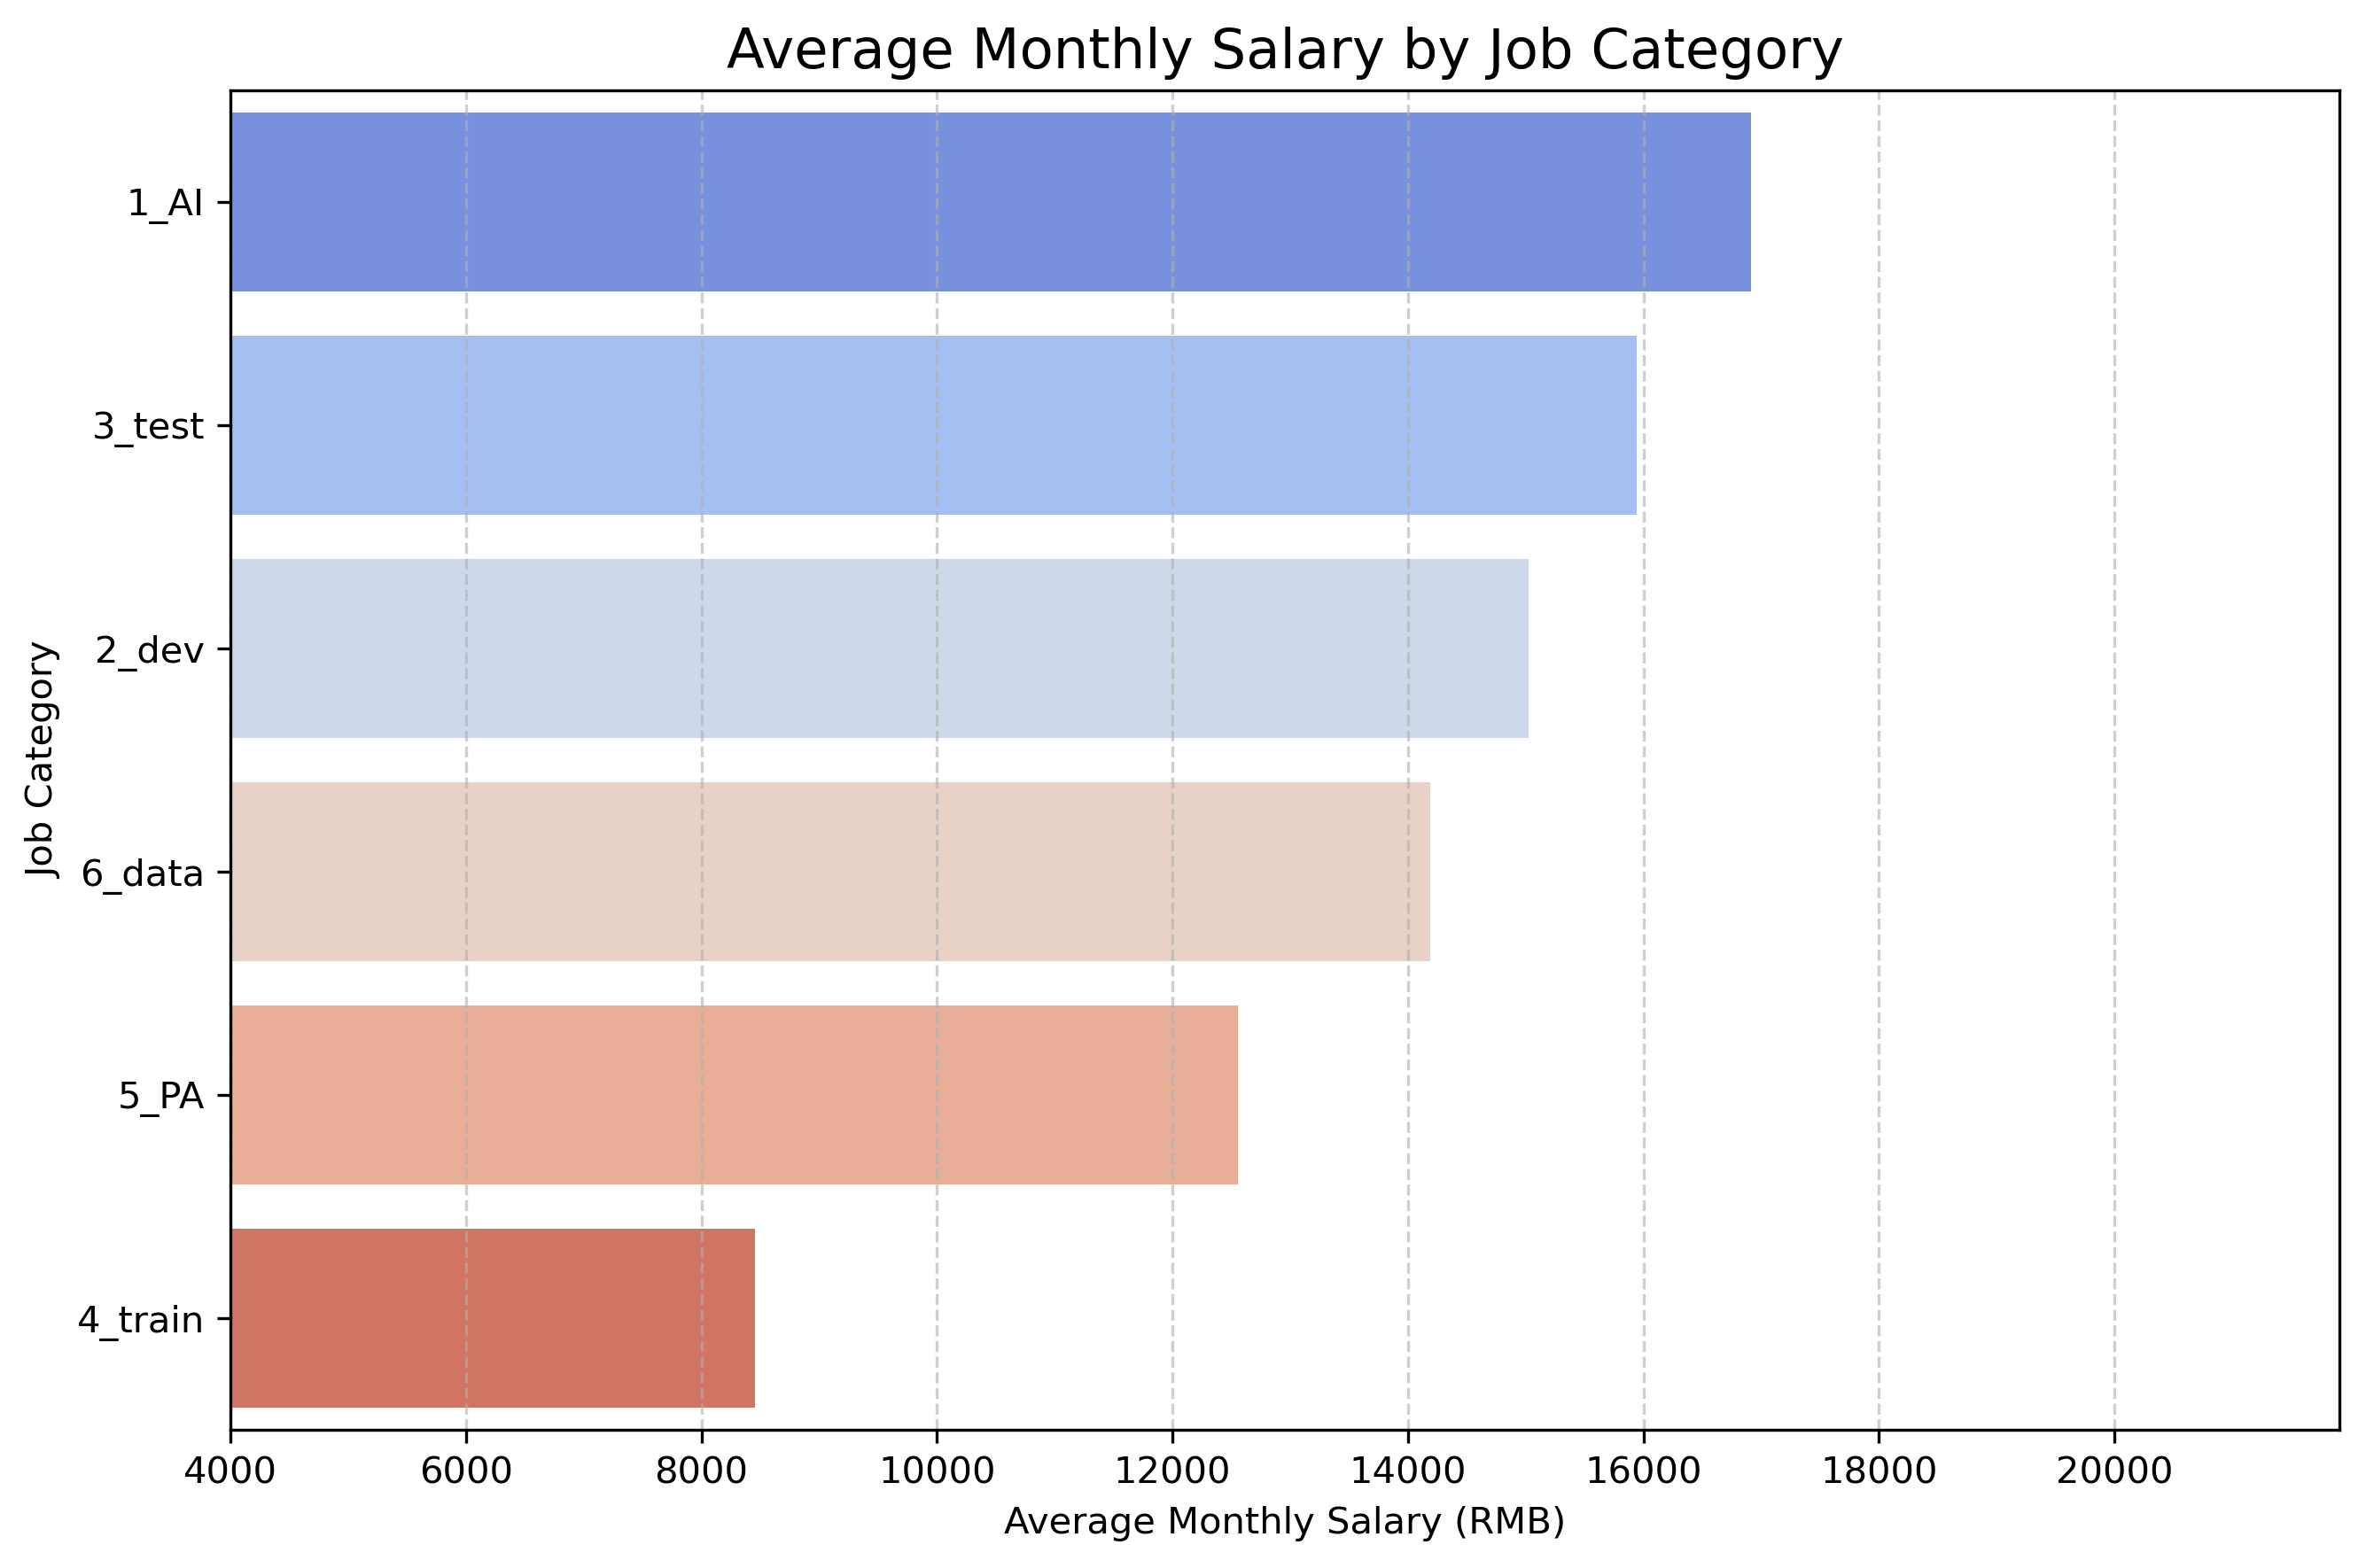

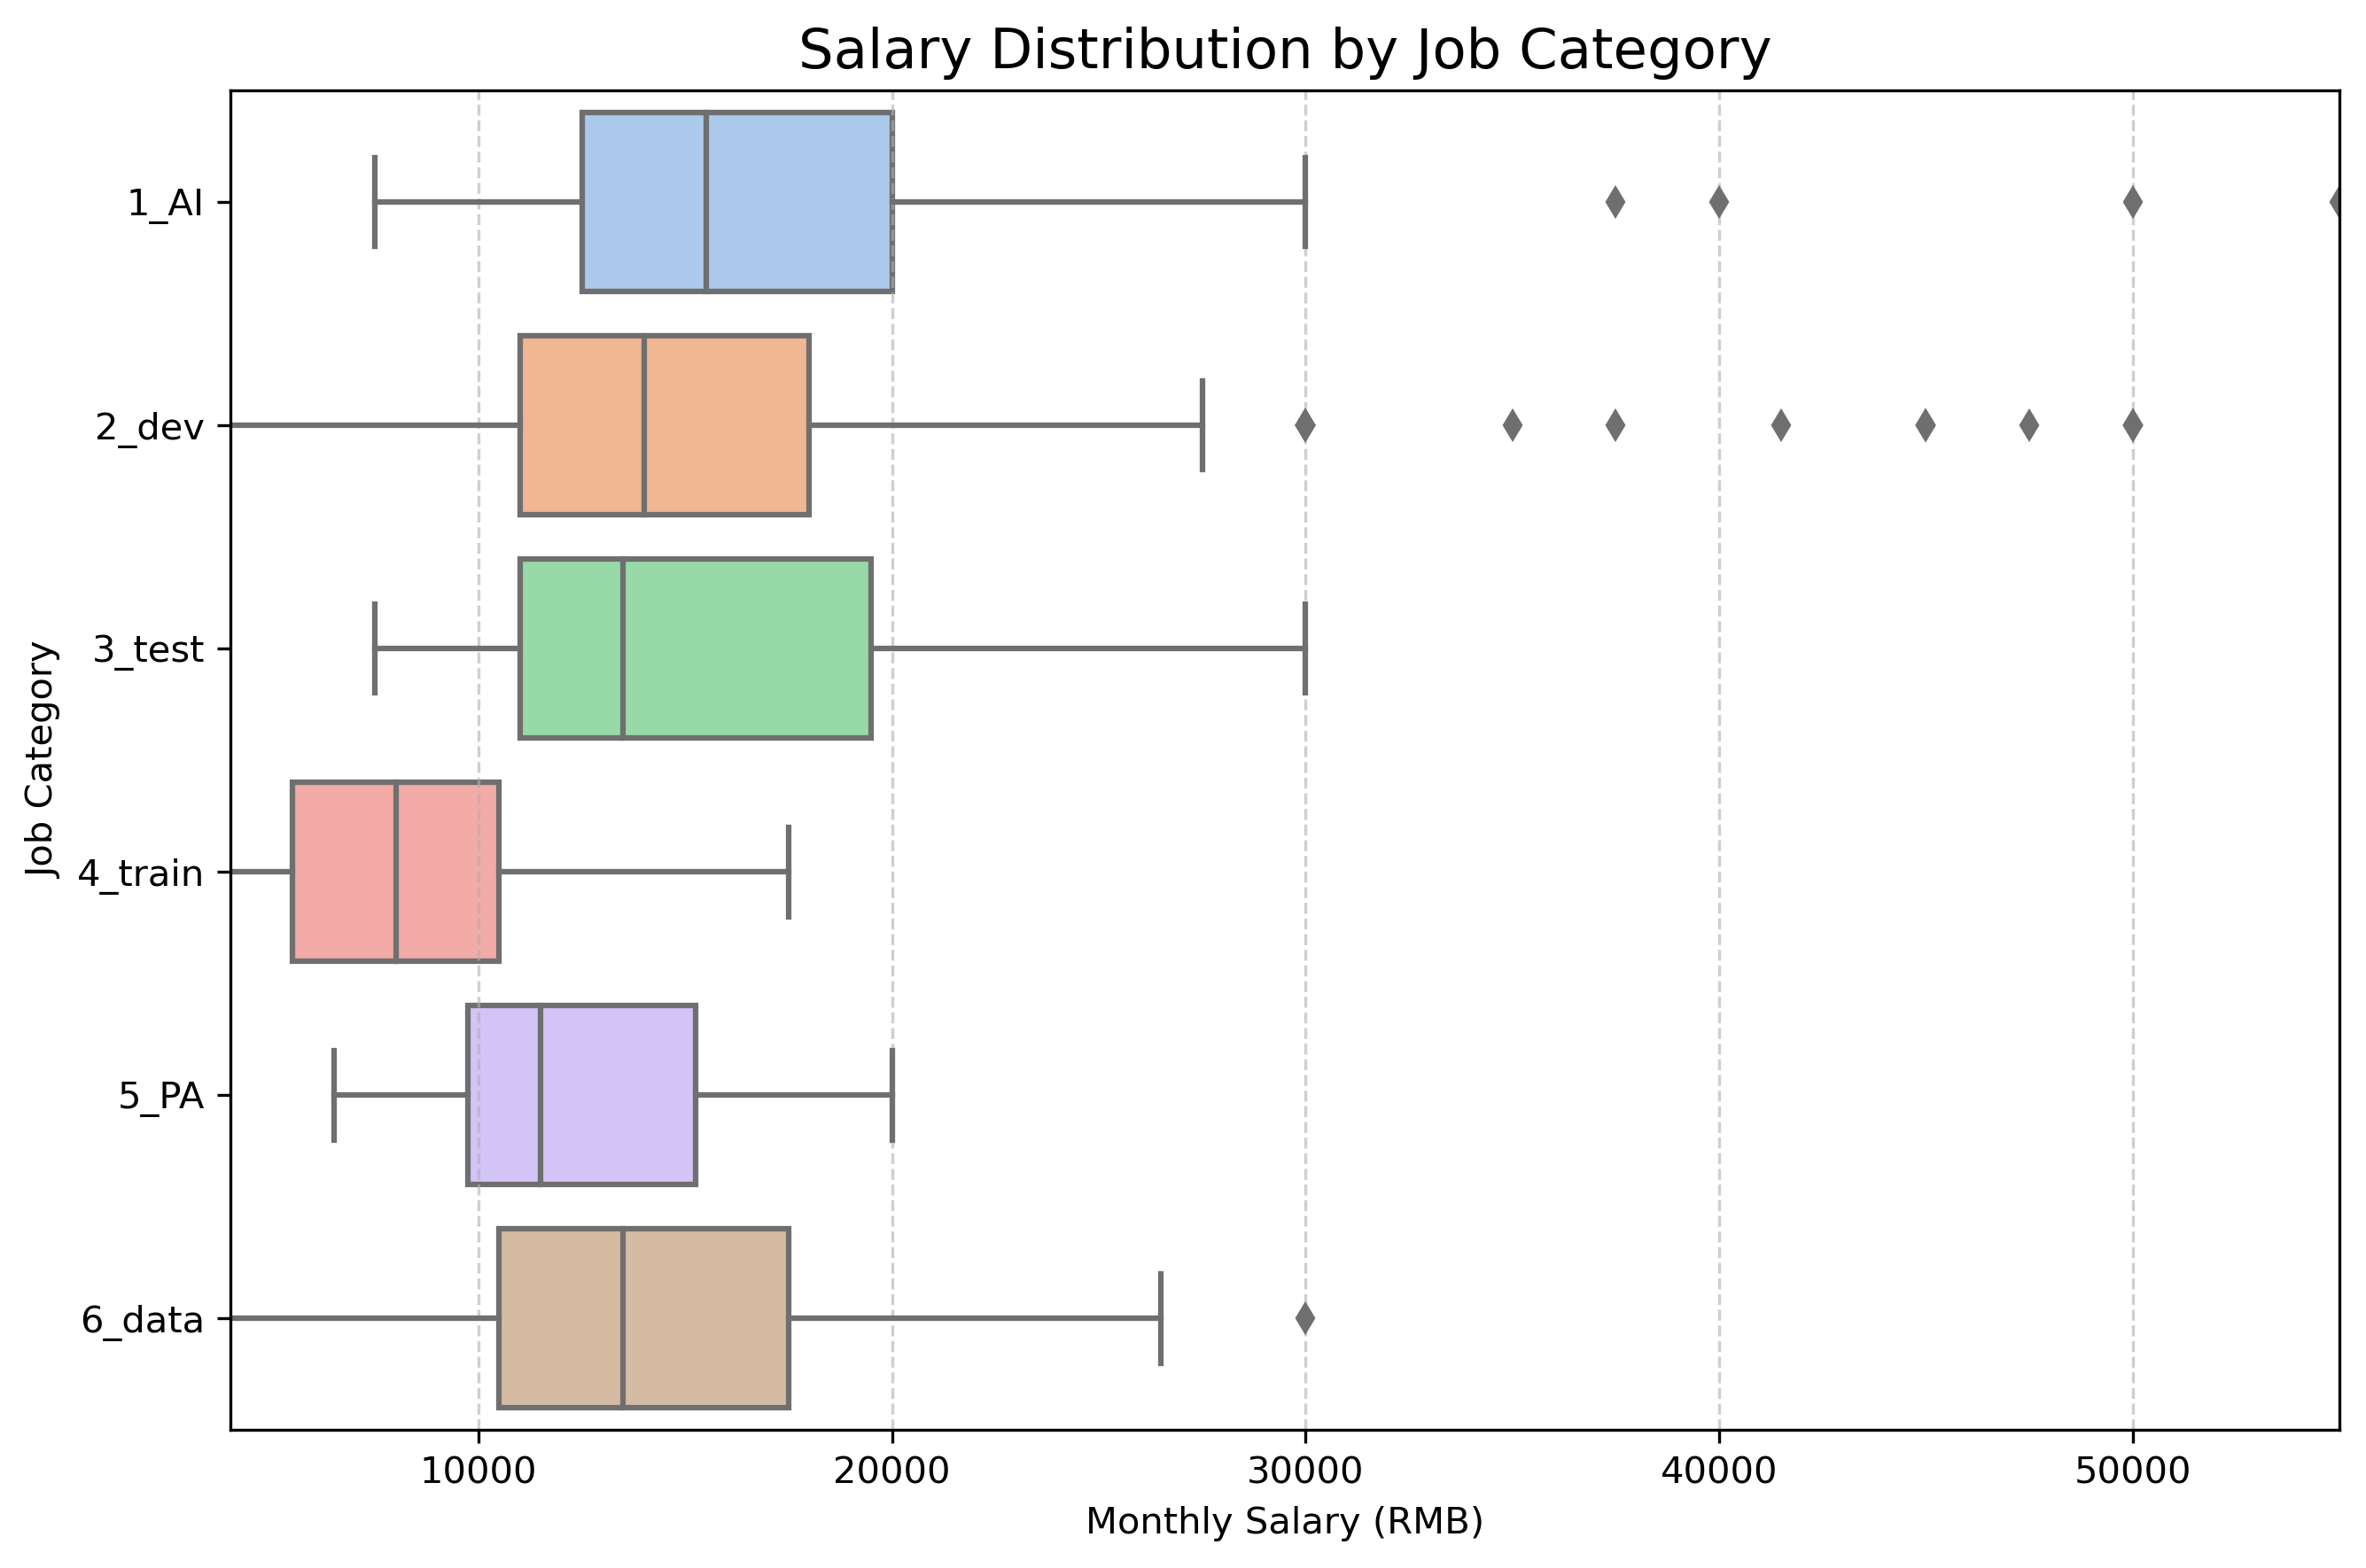

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv("coded_factors.csv", encoding='utf-8')

possible_cols = [c for c in df.columns if 'position' in c.lower() or '岗位' in c or '职位' in c]
if not possible_cols:
    raise KeyError("No job column detected. Please check the file column names.")
else:
    position_col = possible_cols[0]
    print(f"Detected position column：{position_col}")


df = df.dropna(subset=[position_col, 'monthly_salary_avg'])
df = df[df['monthly_salary_avg'] > 1000]  
df[position_col] = df[position_col].astype(str)


position_salary = (
    df.groupby(position_col)['monthly_salary_avg']
    .agg(['mean', 'median', 'count'])
    .reset_index()
    .sort_values('mean', ascending=False)
)

print("\nAverage Salary Table by Position：")
print(position_salary.head(10))


plt.figure(figsize=(9,6))
sns.barplot(
    x='mean',
    y=position_col,
    data=position_salary,
    palette='coolwarm'
)
plt.title("Average Monthly Salary by Job Category", fontsize=15)
plt.xlabel("Average Monthly Salary (RMB)")
plt.ylabel("Job Category")

max_salary = position_salary['mean'].max()
plt.xlim(4000, max_salary + 5000)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


plt.figure(figsize=(9,6))
sns.boxplot(
    x='monthly_salary_avg',
    y=position_col,
    data=df,
    palette='pastel'
)
plt.title("Salary Distribution by Job Category", fontsize=15)
plt.xlabel("Monthly Salary (RMB)")
plt.ylabel("Job Category")
plt.xlim(4000, df['monthly_salary_avg'].max())
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


5. Regression Analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv("coded_factors.csv")

feature_cols = [
    "experience_atleast",         
    "education",                   
    "size(employees_number)",     
    "city",                        
    "benifit"                      
]
target_col = "annual_salary_equiv"  

data = df[feature_cols + [target_col]].dropna()

X = data[feature_cols].values
y = data[target_col].values

print("Data shape:", X.shape, " Target shape:", y.shape)

Data shape: (1665, 5)  Target shape: (1665,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


dt_model = DecisionTreeRegressor(
    max_depth=8,         
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

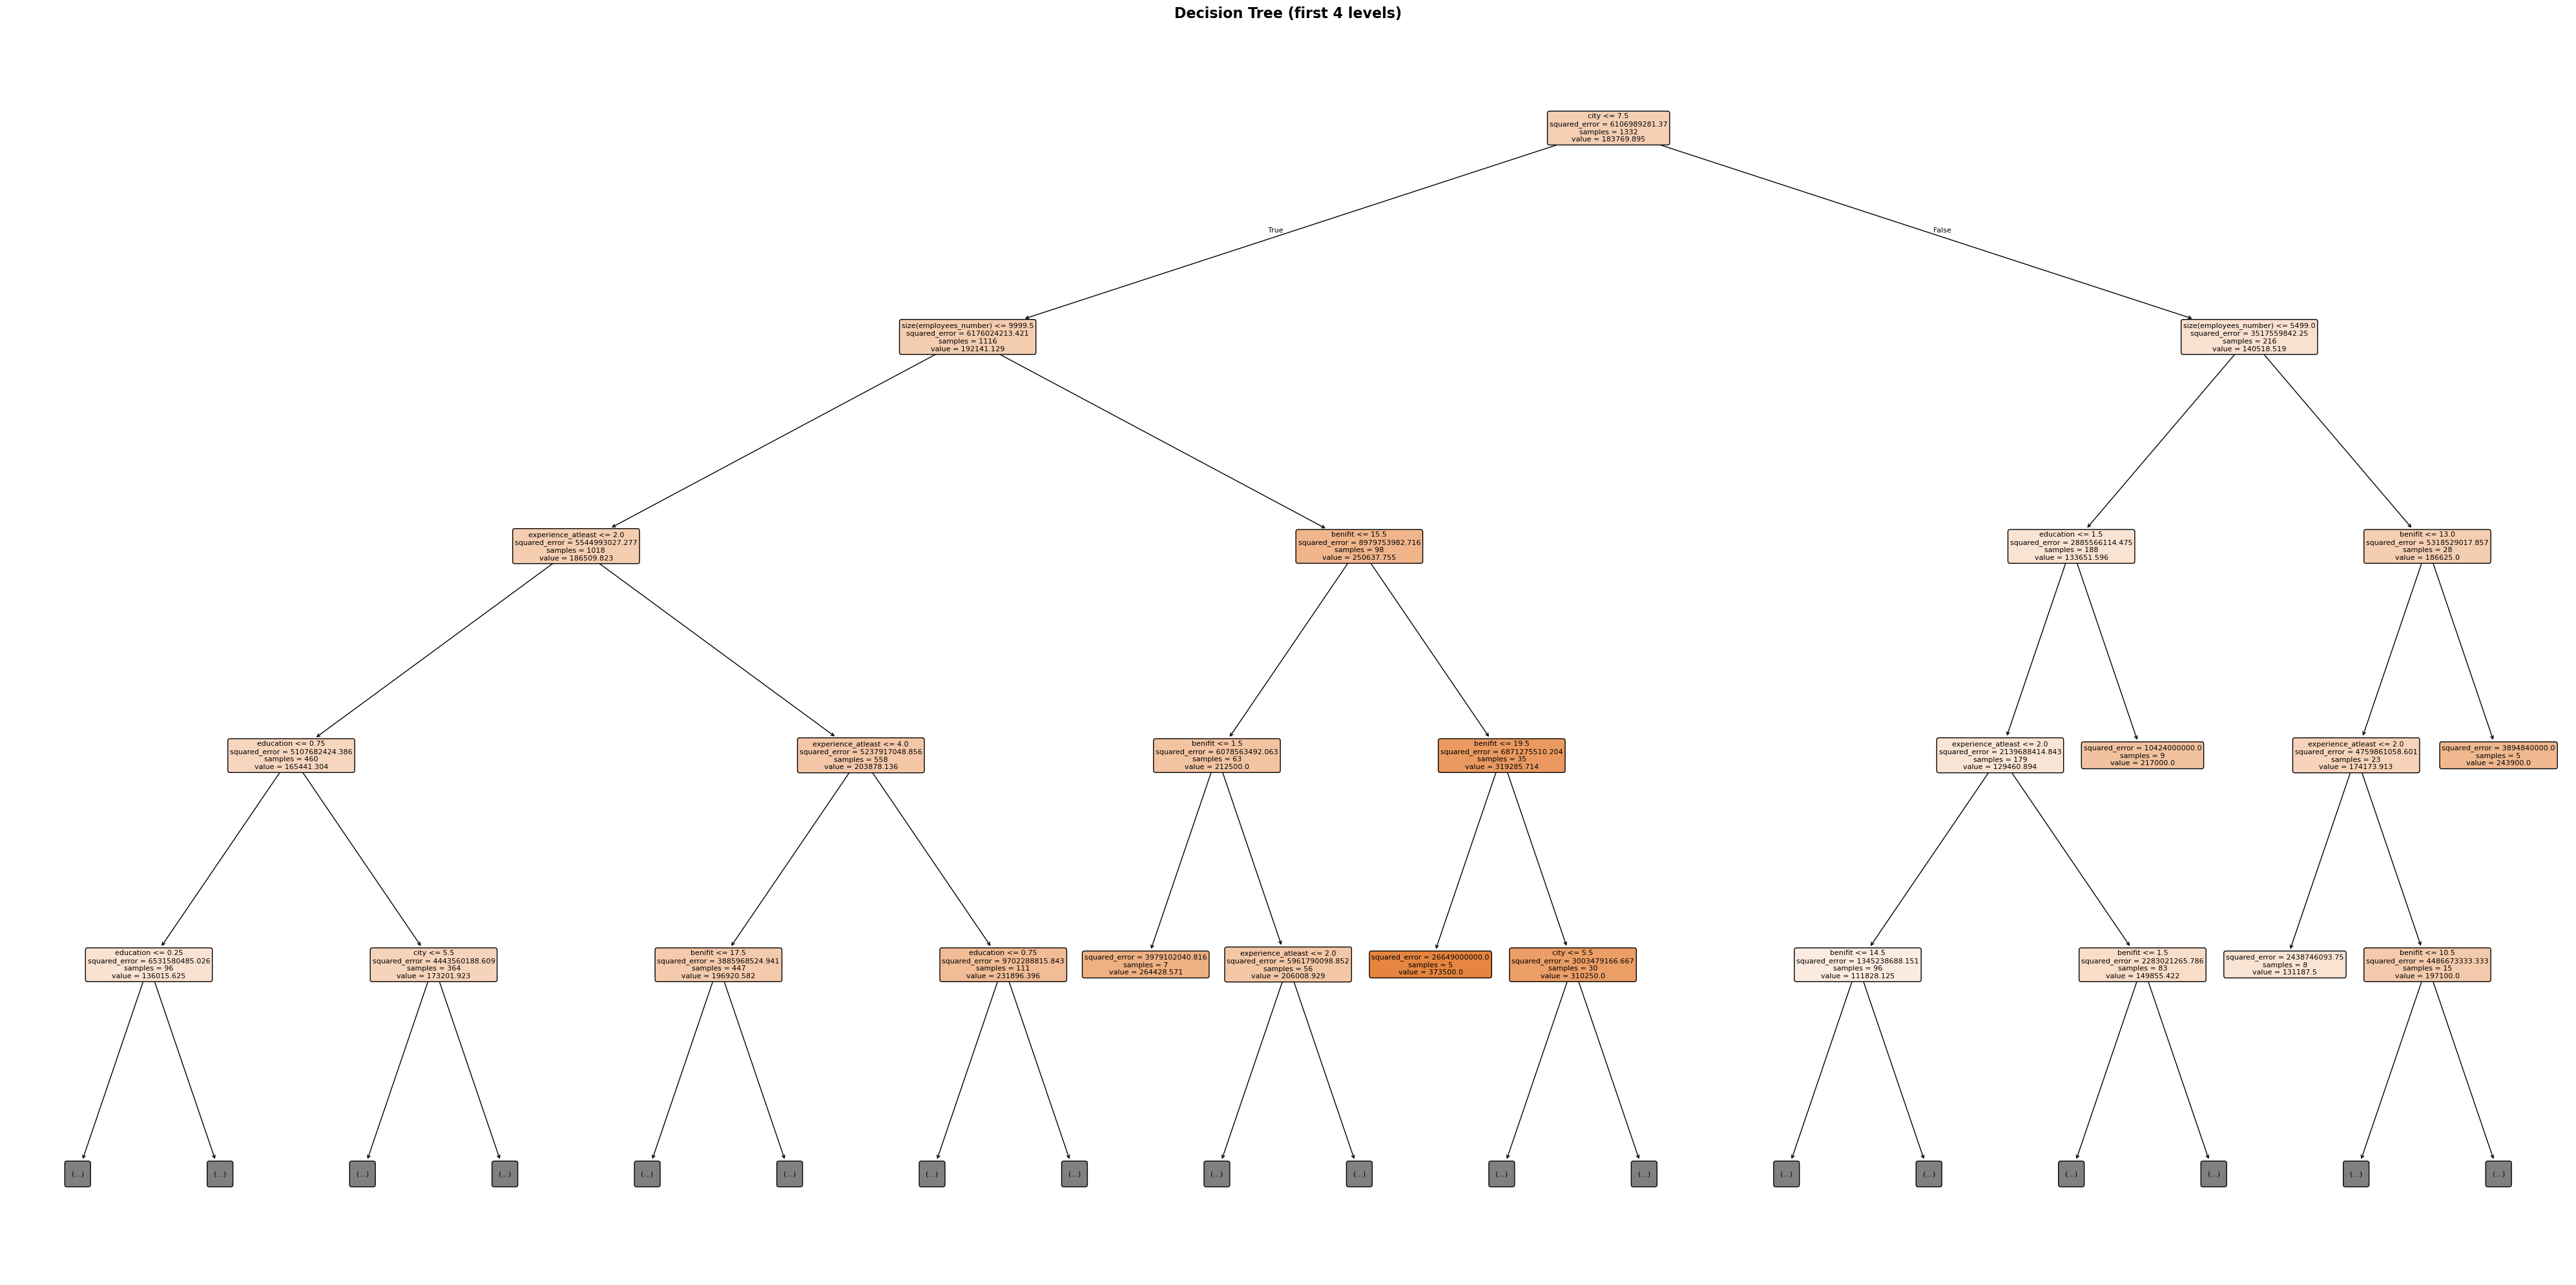

In [15]:
plt.figure(figsize=(40, 20))
plot_tree(
    dt_model,
    feature_names=feature_cols,
    filled=True,
    rounded=True,
    fontsize=8,
    max_depth=4  # 可选：只画前几层，太深会看不清
)
plt.title("Decision Tree (first 4 levels)", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.savefig("decision_tree_structure.png", dpi=300, bbox_inches="tight")
plt.show()

6. Clustering

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

df = pd.read_csv(r'coded_factors.csv')

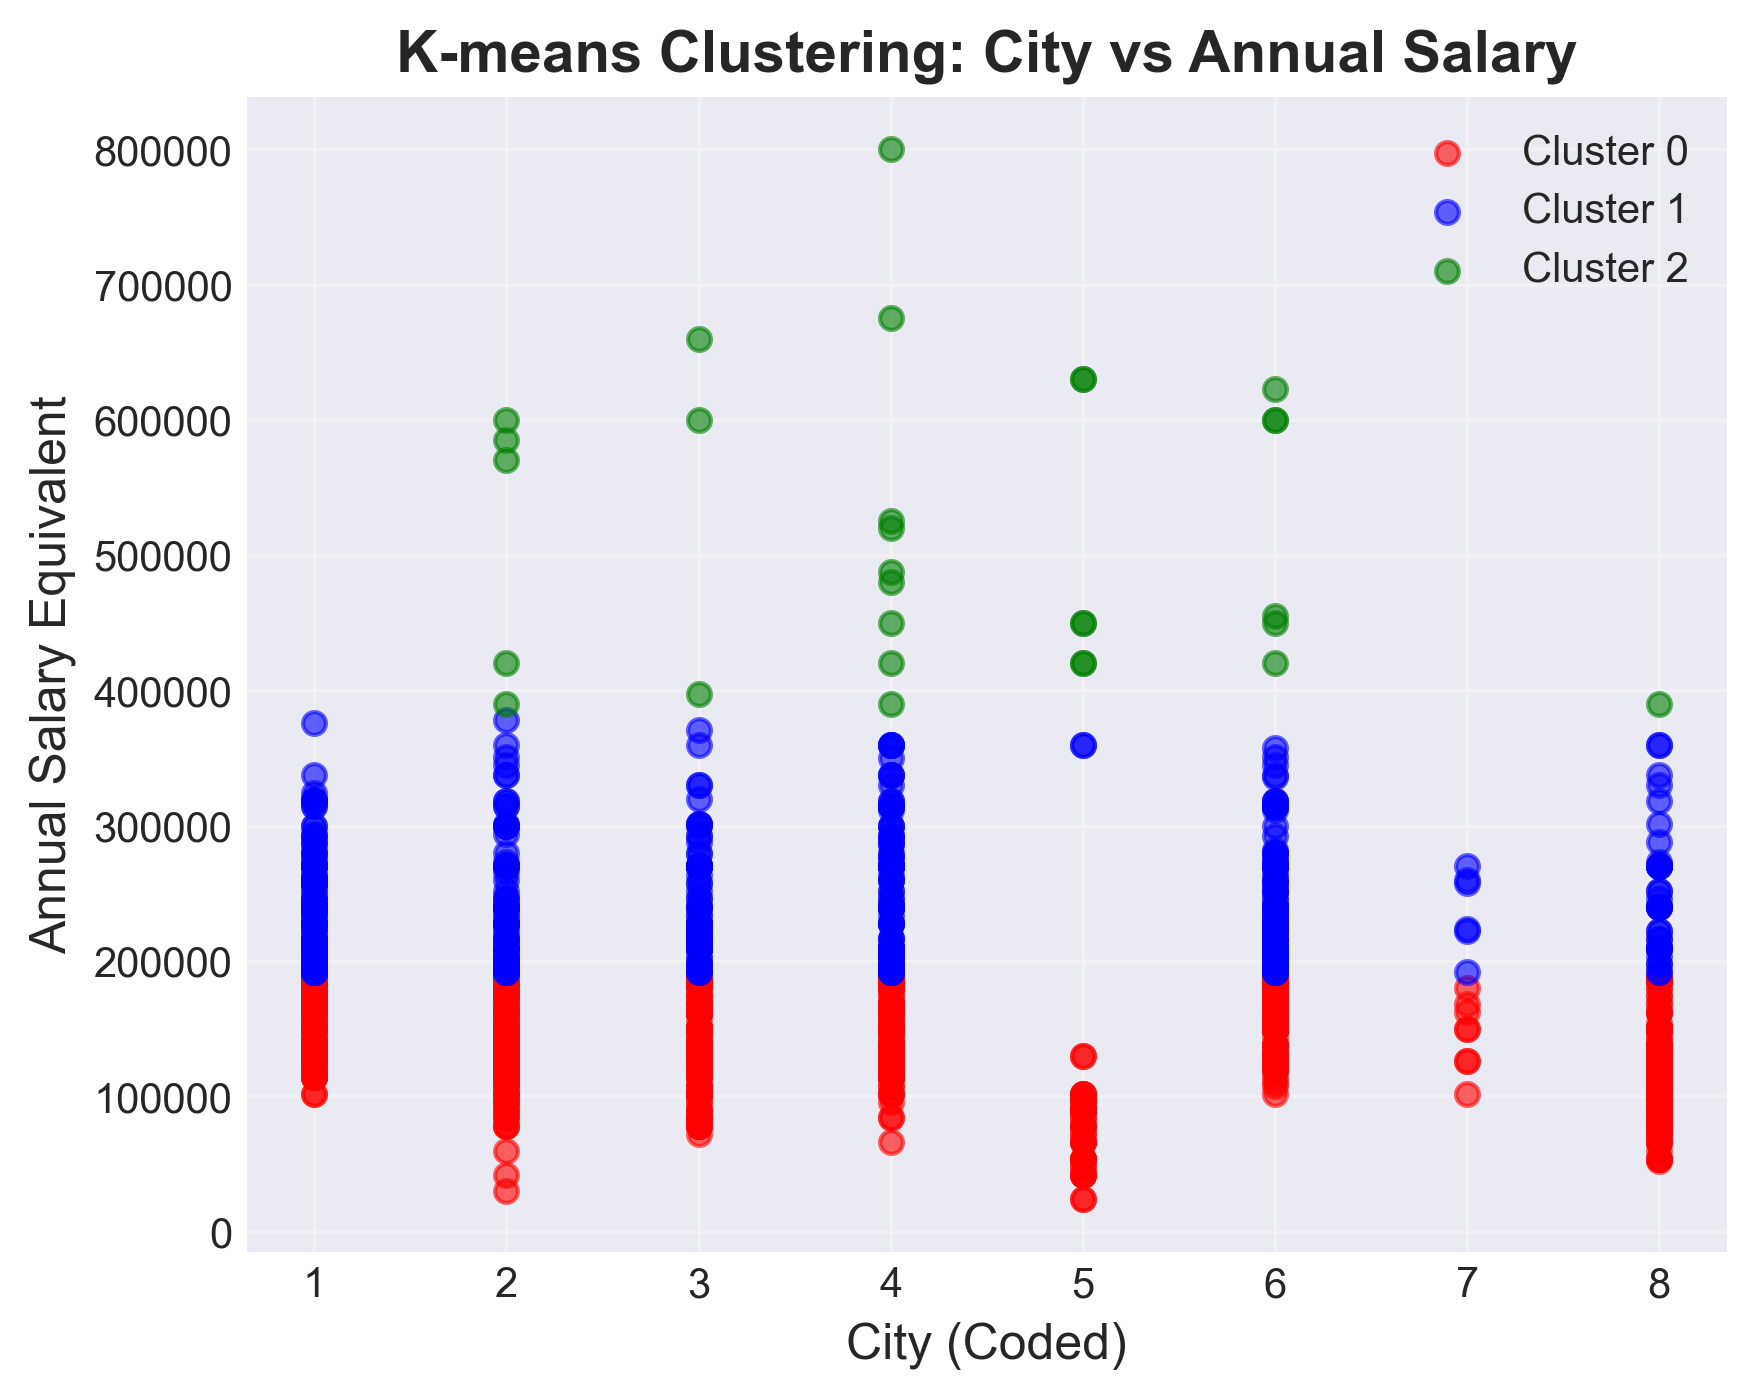

In [68]:
# 1. city vs. annual_salary_equiv
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
X_city = df[['city', 'annual_salary_equiv']].dropna()
kmeans_city = KMeans(n_clusters=3, random_state=42, n_init=10)
X_city['cluster'] = kmeans_city.fit_predict(X_city)
colors = ['red', 'blue', 'green']
for i in range(3):
    cluster_data = X_city[X_city['cluster'] == i]
    plt.scatter(cluster_data['city'], cluster_data['annual_salary_equiv'], 
                c=colors[i], label=f'Cluster {i}', alpha=0.6, s=30)
plt.xlabel('City (Coded)', fontsize=12)
plt.ylabel('Annual Salary Equivalent', fontsize=12)
plt.title('K-means Clustering: City vs Annual Salary', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

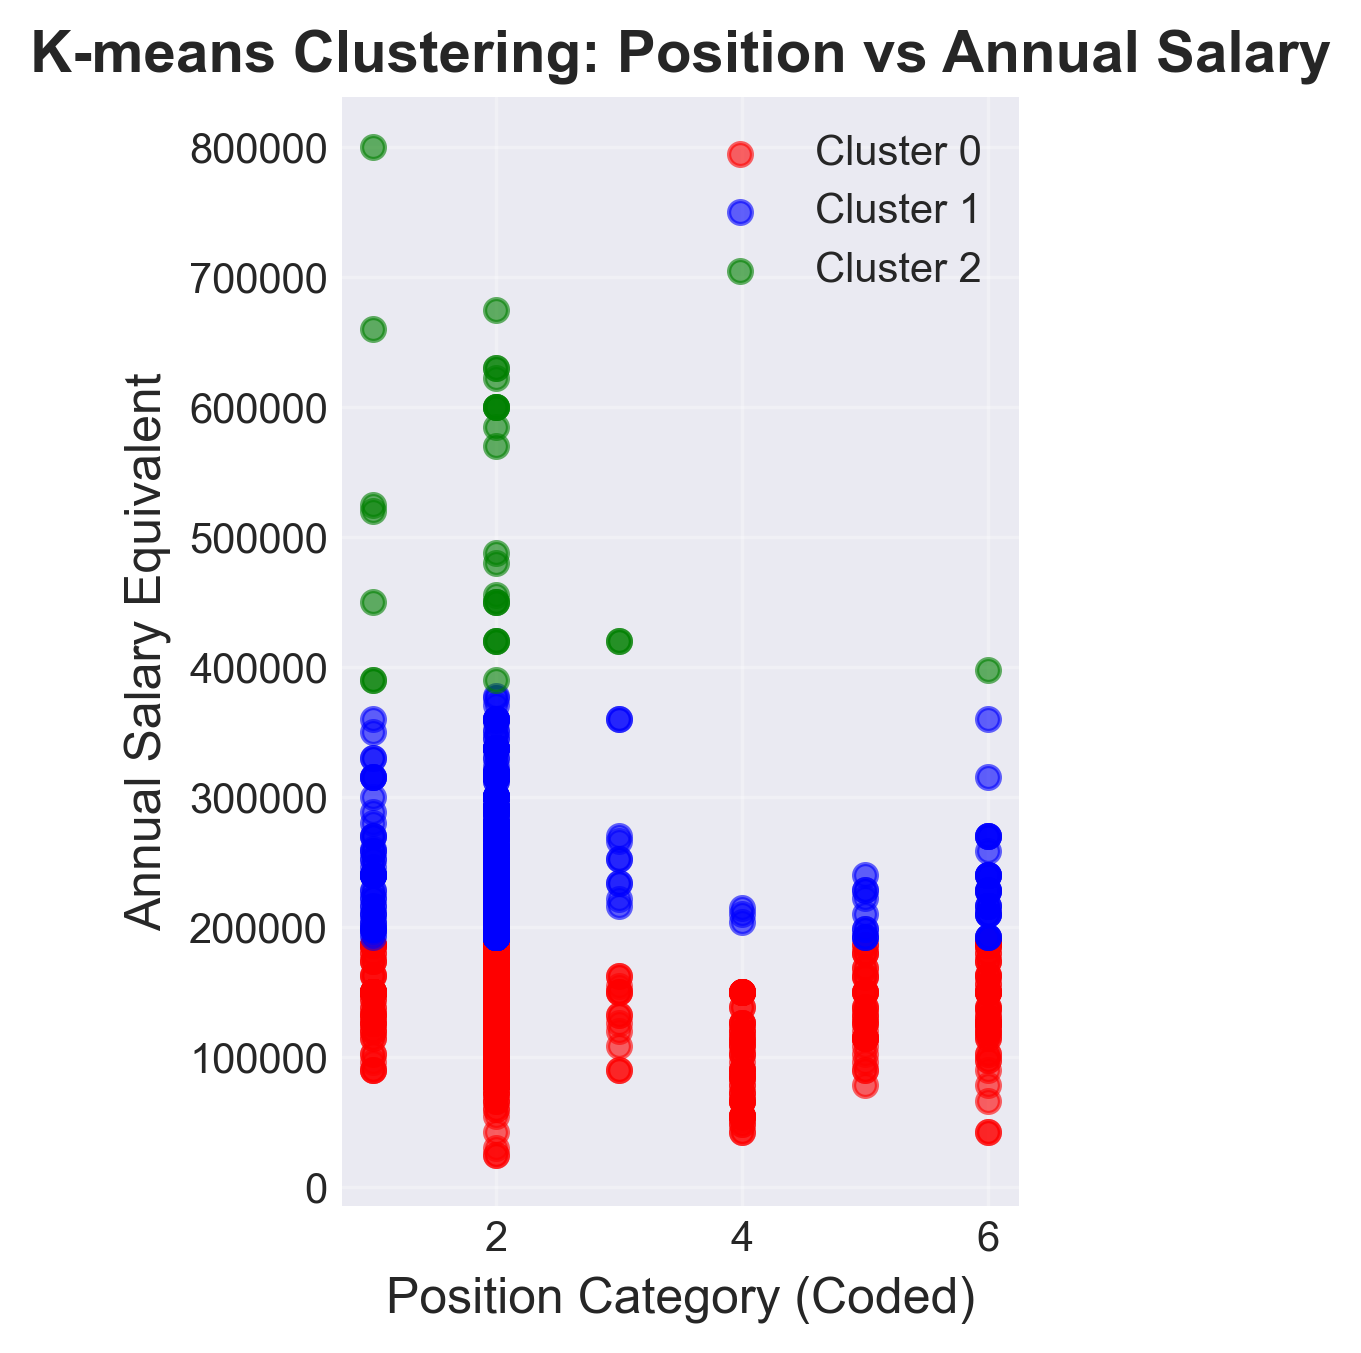

In [69]:
# 2. position_category vs. annual_salary_equiv
plt.subplot(1, 2, 2)
df['position_num'] = df['position_category'].str.extract(r'(\d+)').astype(float)
X_position = df[['position_num', 'annual_salary_equiv']].dropna()
kmeans_position = KMeans(n_clusters=3, random_state=42, n_init=10)
X_position['cluster'] = kmeans_position.fit_predict(X_position)
for i in range(3):
    cluster_data = X_position[X_position['cluster'] == i]
    plt.scatter(cluster_data['position_num'], cluster_data['annual_salary_equiv'], 
                c=colors[i], label=f'Cluster {i}', alpha=0.6, s=30)
plt.xlabel('Position Category (Coded)', fontsize=12)
plt.ylabel('Annual Salary Equivalent', fontsize=12)
plt.title('K-means Clustering: Position vs Annual Salary', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

In [70]:
print(f"\nCluster centers for city:\n{kmeans_city.cluster_centers_}")
print(f"\nCluster centers for position:\n{kmeans_position.cluster_centers_}")


Cluster centers for city:
[[4.27909270e+00 1.36238166e+05]
 [3.54589372e+00 2.44795491e+05]
 [4.30000000e+00 5.16916667e+05]]

Cluster centers for position:
[[2.40039448e+00 1.36238166e+05]
 [2.17874396e+00 2.44795491e+05]
 [1.96666667e+00 5.16916667e+05]]


In [71]:
# Summary
print("\n Annual salary Clustering")
for i in range(3):
    cluster_data = X_city[X_city['cluster'] == i]
    print(f"Cluster {i}: {len(cluster_data)} samples, "
          f"average Salary: {cluster_data['annual_salary_equiv'].mean():.0f}")


 Annual salary Clustering
Cluster 0: 1014 samples, average Salary: 136238
Cluster 1: 621 samples, average Salary: 244795
Cluster 2: 30 samples, average Salary: 516917


7. Evaluation

7.1 Evaluation of Regression

In [16]:
y_train_pred = dt_model.predict(X_train)
y_test_pred  = dt_model.predict(X_test)

train_r2   = r2_score(y_train, y_train_pred)
test_r2    = r2_score(y_test,  y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test,  y_test_pred))

print("Decision Tree Model Performance:")
print(f"  Training set R²: {train_r2:.4f}, RMSE: {train_rmse:,.2f}")
print(f"  Testing  set R²: {test_r2:.4f}, RMSE: {test_rmse:,.2f}")

# ============================================
# 6. Feature importance (from real data)
# ============================================
feature_importance = dt_model.feature_importances_
impact_percent = feature_importance / feature_importance.sum() * 100

print("\nFeature importance (sorted):")
for name, imp, pct in sorted(
    zip(feature_cols, feature_importance, impact_percent),
    key=lambda x: x[1],
    reverse=True
):
    print(f"{name:25s} importance={imp:.4f}, impact={pct:5.2f}%")

Decision Tree Model Performance:
  Training set R²: 0.4072, RMSE: 60,169.56
  Testing  set R²: 0.2915, RMSE: 69,668.64

Feature importance (sorted):
benifit                   importance=0.2610, impact=26.10%
city                      importance=0.2602, impact=26.02%
experience_atleast        importance=0.2141, impact=21.41%
size(employees_number)    importance=0.1801, impact=18.01%
education                 importance=0.0846, impact= 8.46%


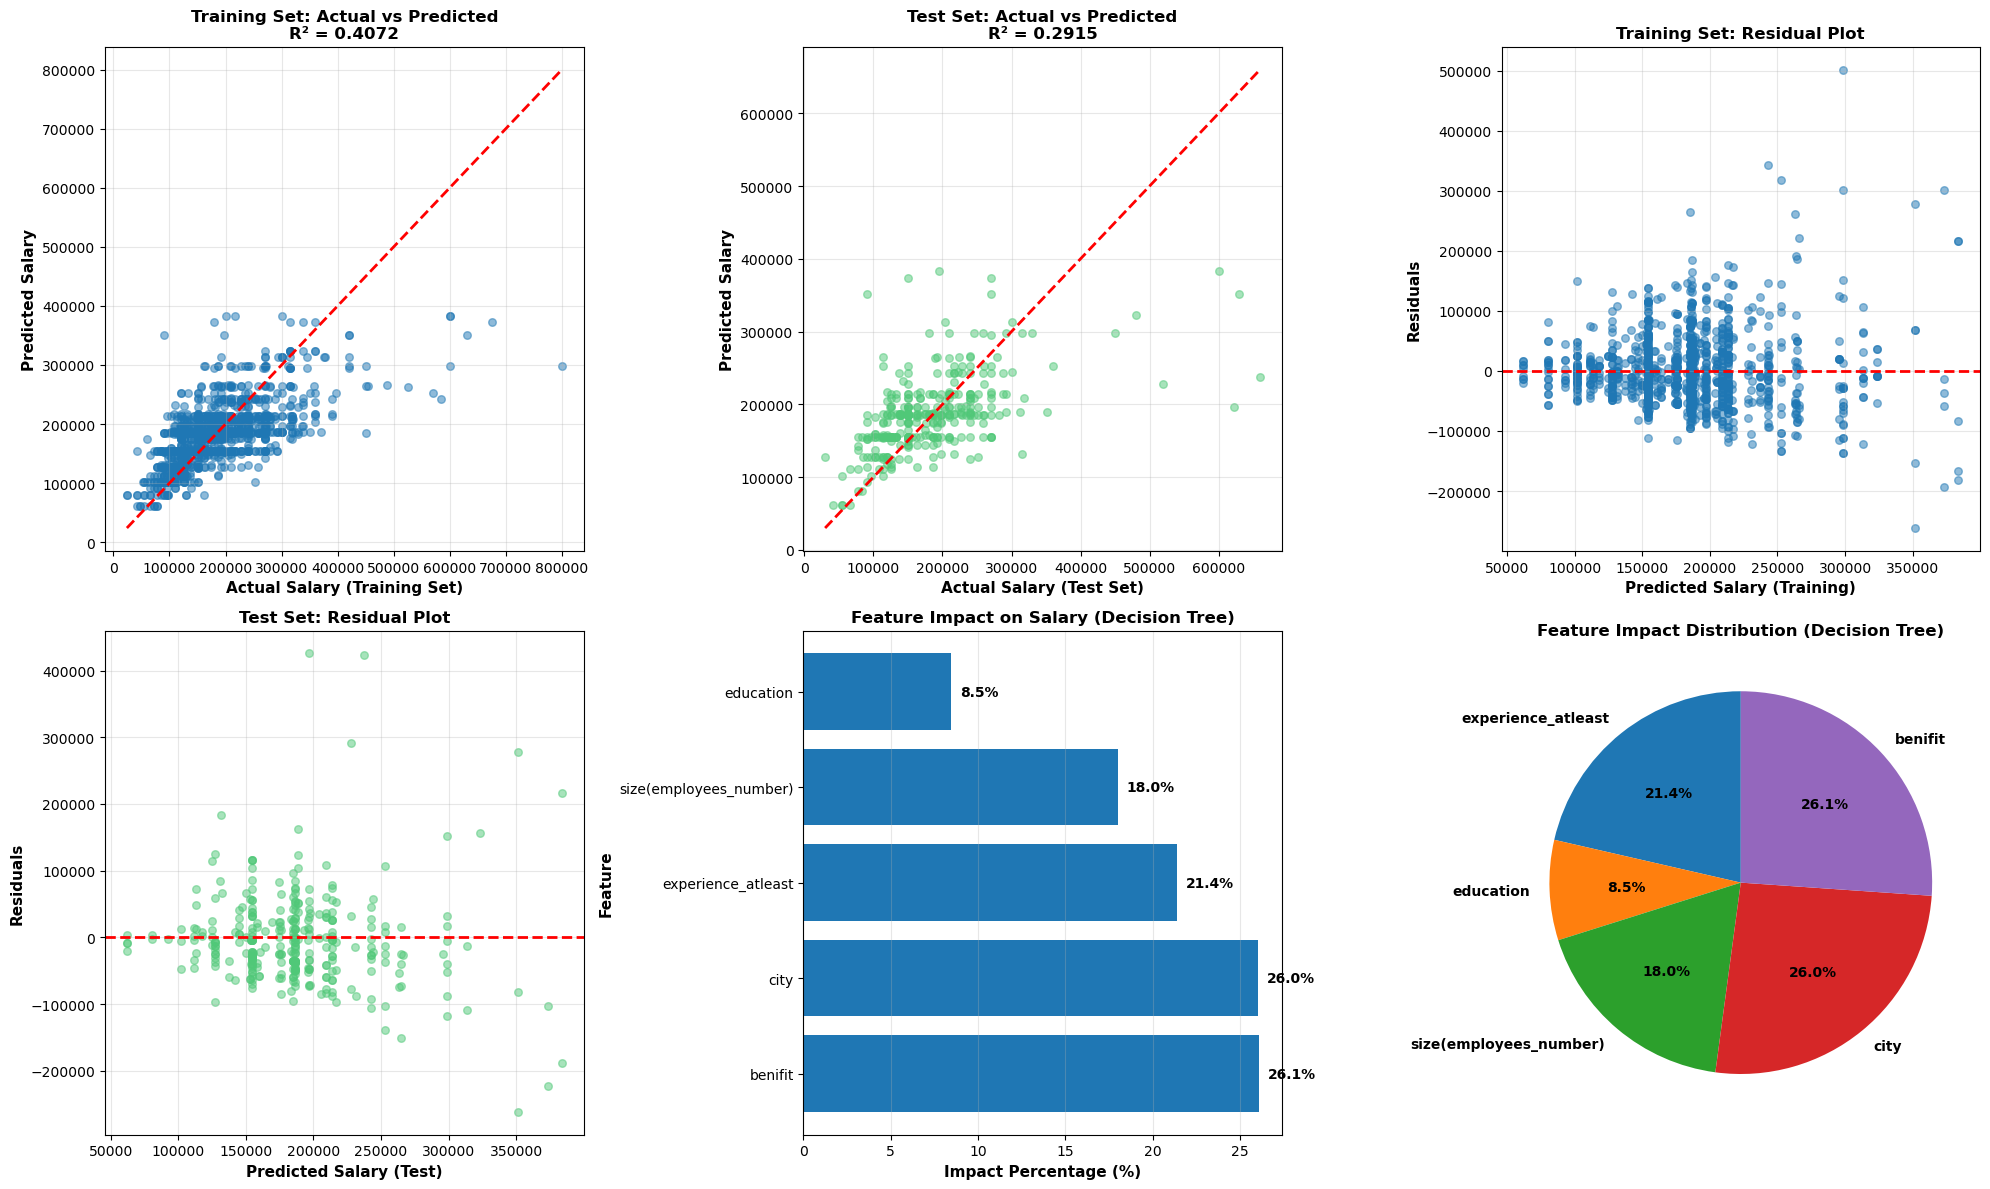

In [17]:
fig = plt.figure(figsize=(20, 12))

# ---- 1. Training: Actual vs Predicted ----
ax1 = plt.subplot(2, 3, 1)
ax1.scatter(y_train, y_train_pred, alpha=0.5, s=30)
ax1.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         "r--", lw=2)
ax1.set_xlabel("Actual Salary (Training Set)", fontsize=11, fontweight="bold")
ax1.set_ylabel("Predicted Salary", fontsize=11, fontweight="bold")
ax1.set_title(f"Training Set: Actual vs Predicted\nR² = {train_r2:.4f}",
              fontsize=12, fontweight="bold")
ax1.grid(True, alpha=0.3)

# ---- 2. Testing: Actual vs Predicted ----
ax2 = plt.subplot(2, 3, 2)
ax2.scatter(y_test, y_test_pred, alpha=0.5, s=30, color="#50C878")
ax2.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", lw=2)
ax2.set_xlabel("Actual Salary (Test Set)", fontsize=11, fontweight="bold")
ax2.set_ylabel("Predicted Salary", fontsize=11, fontweight="bold")
ax2.set_title(f"Test Set: Actual vs Predicted\nR² = {test_r2:.4f}",
              fontsize=12, fontweight="bold")
ax2.grid(True, alpha=0.3)

# ---- 3. Training residuals ----
ax3 = plt.subplot(2, 3, 3)
residuals_train = y_train - y_train_pred
ax3.scatter(y_train_pred, residuals_train, alpha=0.5, s=30)
ax3.axhline(y=0, color="r", linestyle="--", lw=2)
ax3.set_xlabel("Predicted Salary (Training)", fontsize=11, fontweight="bold")
ax3.set_ylabel("Residuals", fontsize=11, fontweight="bold")
ax3.set_title("Training Set: Residual Plot",
              fontsize=12, fontweight="bold")
ax3.grid(True, alpha=0.3)

# ---- 4. Testing residuals ----
ax4 = plt.subplot(2, 3, 4)
residuals_test = y_test - y_test_pred
ax4.scatter(y_test_pred, residuals_test, alpha=0.5, s=30, color="#50C878")
ax4.axhline(y=0, color="r", linestyle="--", lw=2)
ax4.set_xlabel("Predicted Salary (Test)", fontsize=11, fontweight="bold")
ax4.set_ylabel("Residuals", fontsize=11, fontweight="bold")
ax4.set_title("Test Set: Residual Plot",
              fontsize=12, fontweight="bold")
ax4.grid(True, alpha=0.3)

# ---- 5. Feature impact – bar chart ----
ax5 = plt.subplot(2, 3, 5)
order = np.argsort(impact_percent)[::-1]
ordered_names = np.array(feature_cols)[order]
ordered_imp = impact_percent[order]

bars = ax5.barh(ordered_names, ordered_imp)
ax5.set_xlabel("Impact Percentage (%)", fontsize=11, fontweight="bold")
ax5.set_ylabel("Feature", fontsize=11, fontweight="bold")
ax5.set_title("Feature Impact on Salary (Decision Tree)",
              fontsize=12, fontweight="bold")
ax5.grid(True, alpha=0.3, axis="x")

for i, (bar, val) in enumerate(zip(bars, ordered_imp)):
    ax5.text(val + 0.5, bar.get_y() + bar.get_height()/2,
             f"{val:.1f}%", va="center",
             fontsize=10, fontweight="bold")

# ---- 6. Feature impact – pie chart ----
ax6 = plt.subplot(2, 3, 6)
wedges, texts, autotexts = ax6.pie(
    impact_percent,
    labels=feature_cols,
    autopct="%1.1f%%",
    startangle=90,
    textprops={"fontsize": 10, "fontweight": "bold"}
)
ax6.set_title("Feature Impact Distribution (Decision Tree)",
              fontsize=12, fontweight="bold")

plt.tight_layout()
plt.savefig("salary_decision_tree_comprehensive_analysis.png",
            dpi=300, bbox_inches="tight")
plt.show()

7.2 Evaluation of Clustering

In [73]:
#Evaluation 1: City vs Anuual Salary
# Quantitative Evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score

X = df[['city', 'annual_salary_equiv']].dropna()
labels = X_city['cluster']

sil_score = silhouette_score(X[['city','annual_salary_equiv']], labels)
db_score = davies_bouldin_score(X[['city','annual_salary_equiv']], labels)
print(f"Silhouette Score: {sil_score:.3f}, Davies-Bouldin: {db_score:.3f}")

Silhouette Score: 0.594, Davies-Bouldin: 0.523


In [74]:
# Statistical Evaluation 
X_city.groupby('cluster')['annual_salary_equiv'].agg(['count','mean','median'])

count           mean    median
cluster                                
0         1014  136238.165680  138000.0
1          621  244795.491143  240000.0
2           30  516916.666667  483750.0

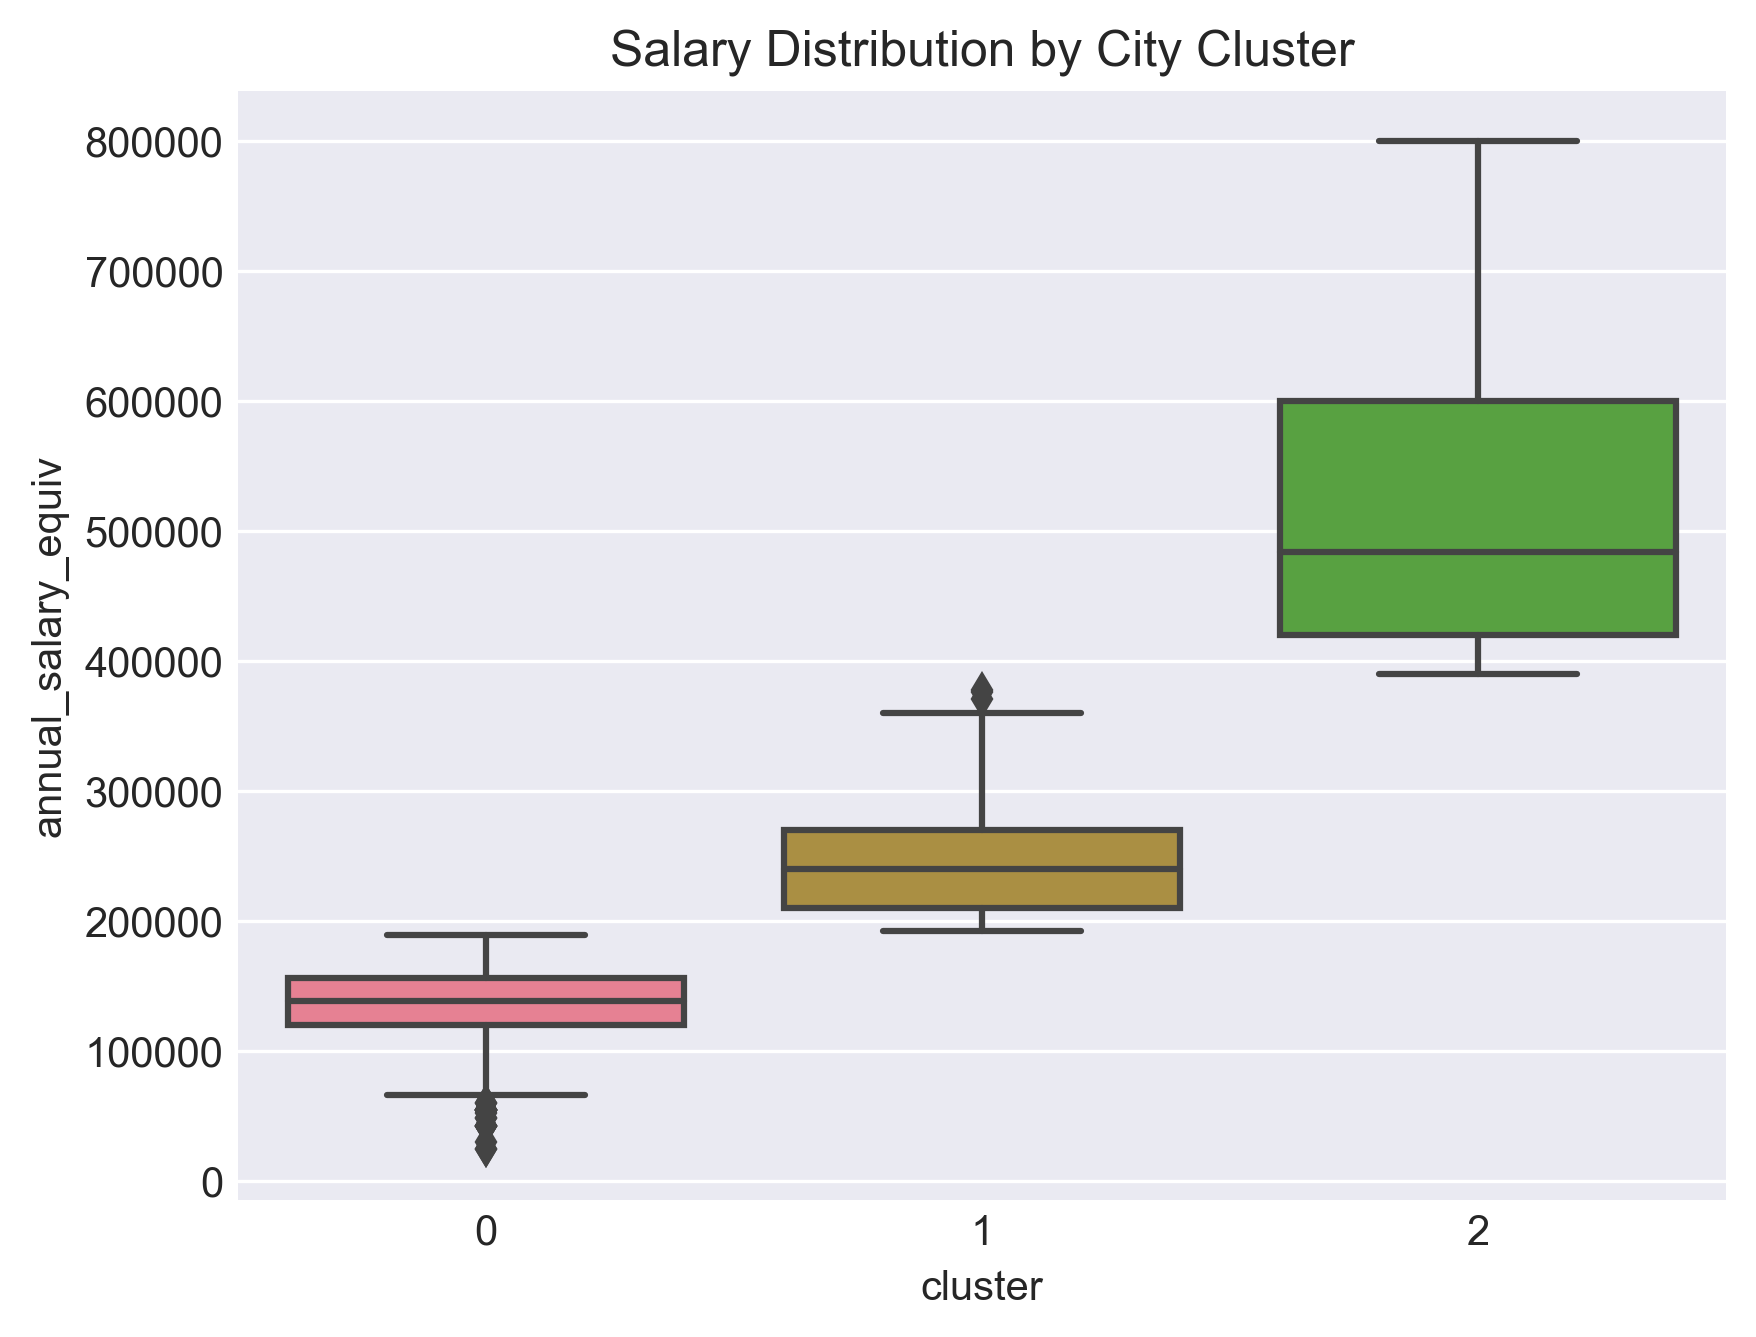

In [75]:
#Visualization Explanation
import seaborn as sns
sns.boxplot(x='cluster', y='annual_salary_equiv', data=X_city)
plt.title('Salary Distribution by City Cluster')
plt.show()

In [76]:
#Evaluation 2: Position vs Annual Salary
#Quantitative Evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score

sil_pos = silhouette_score(X_position[['position_num','annual_salary_equiv']], X_position['cluster'])
db_pos = davies_bouldin_score(X_position[['position_num','annual_salary_equiv']], X_position['cluster'])

print(f"Silhouette Score: {sil_pos:.3f}, Davies-Bouldin Index: {db_pos:.3f}")

Silhouette Score: 0.594, Davies-Bouldin Index: 0.523


In [77]:
# Statistical Evaluation
X_position.groupby('cluster')['annual_salary_equiv'].agg(['count', 'mean', 'median'])

count           mean    median
cluster                                
0         1014  136238.165680  138000.0
1          621  244795.491143  240000.0
2           30  516916.666667  483750.0

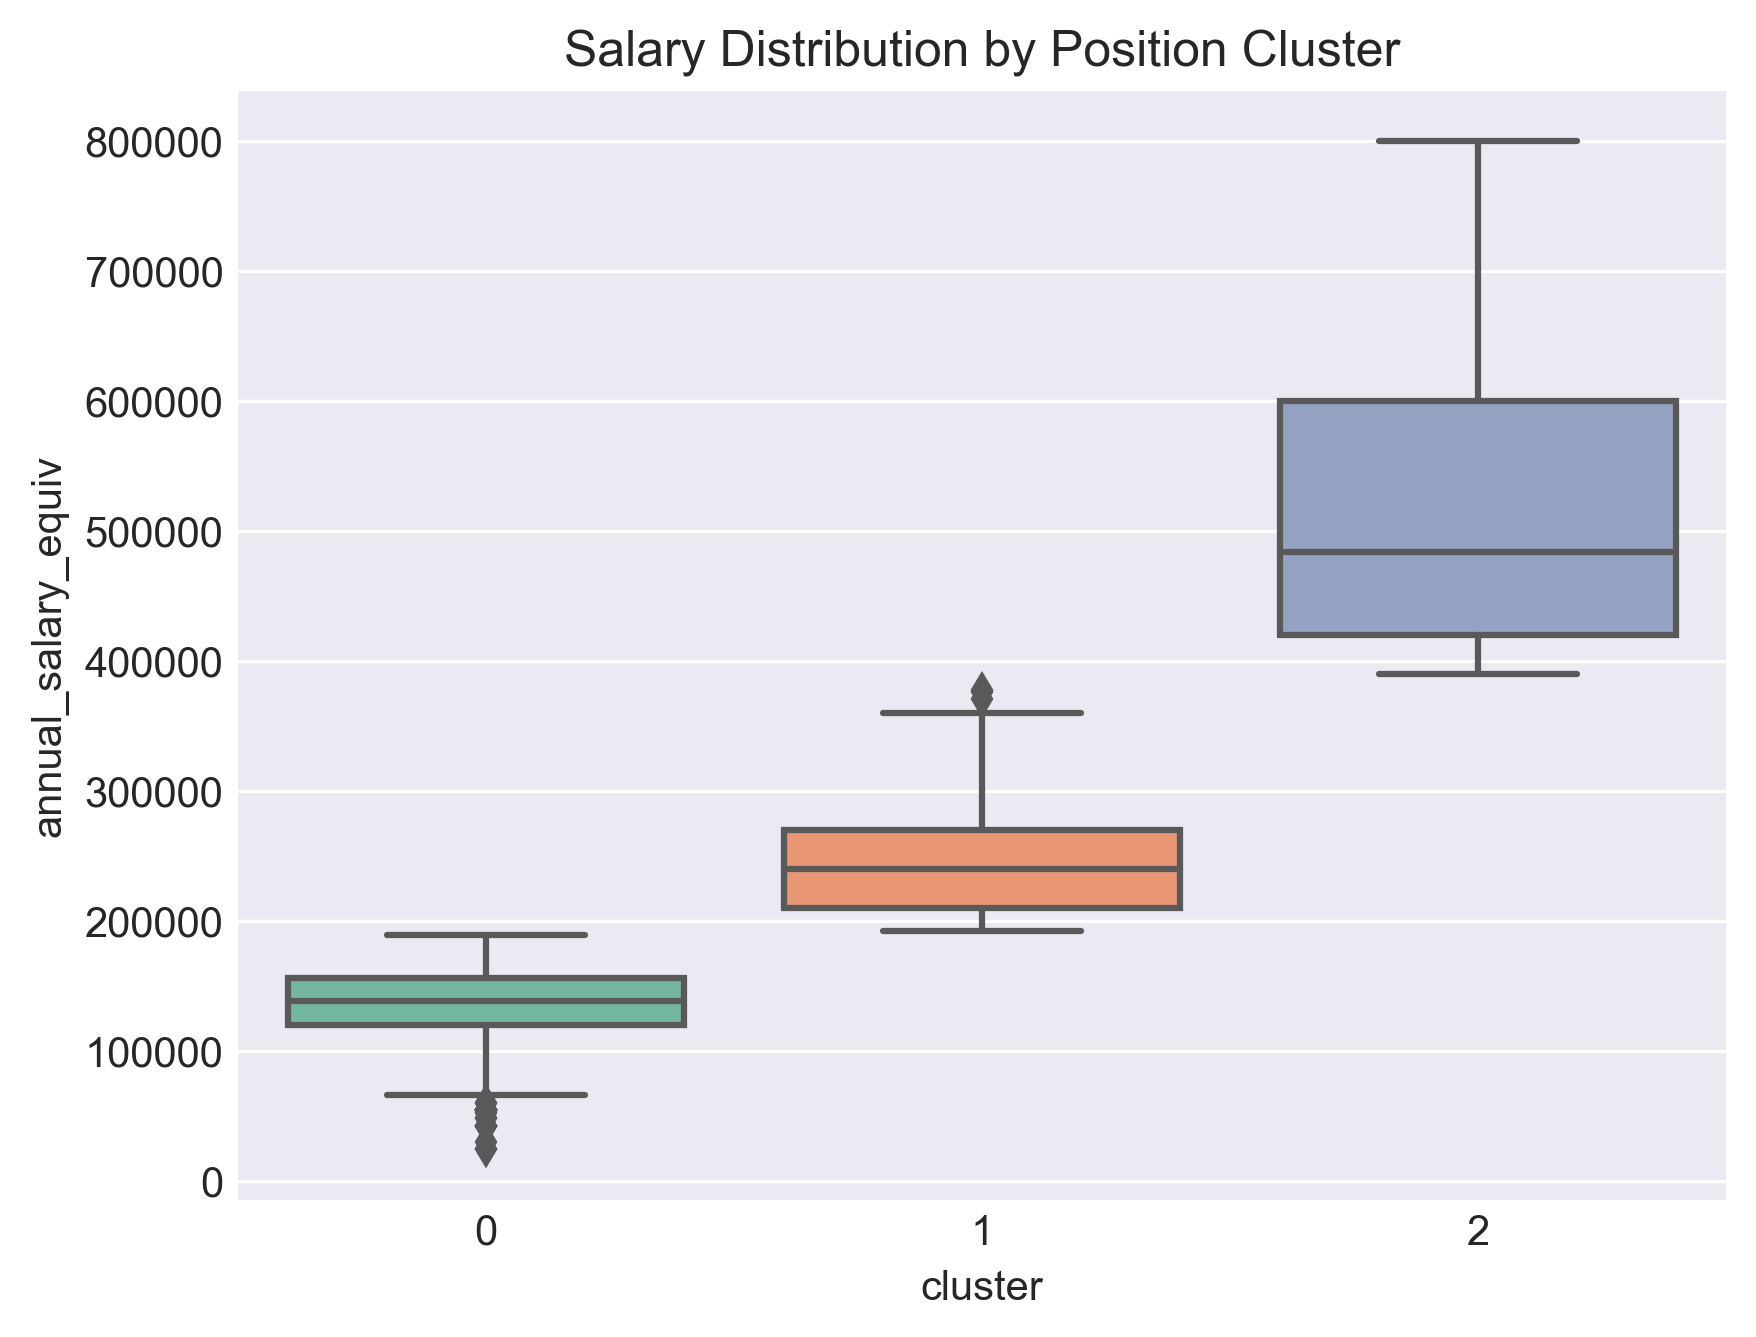

In [78]:
#Visualization Explanation
import seaborn as sns
sns.boxplot(x='cluster', y='annual_salary_equiv', data=X_position, palette='Set2')
plt.title('Salary Distribution by Position Cluster')
plt.show()